## 상가(상권) 정보 분석하기

### 1. 데이터및 라이브러리 로드 


In [4]:
#라이브러리 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
#한글폰트 설정 
plt.rc ('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

#글씨색 진하게 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\김선림\AppData\Local\Temp\ipykernel_10676\2348611846.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


<AxesSubplot:title={'center':'한글폰트 설정'}>

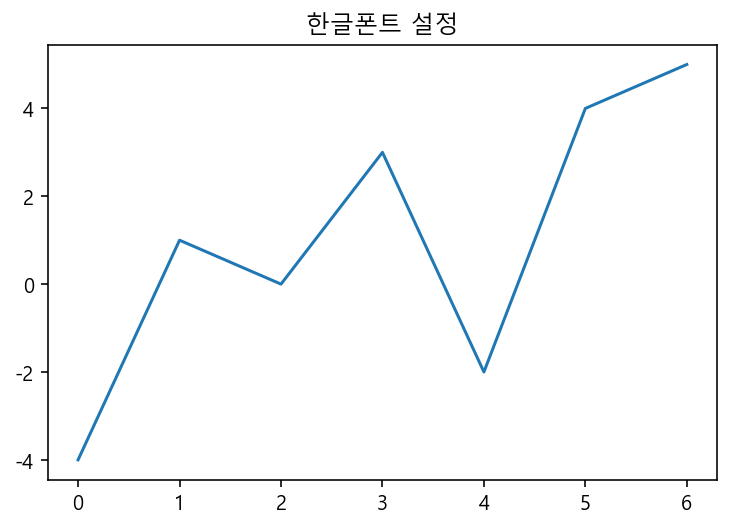

In [6]:
# 한글폰트 설정 
pd.Series([-4,1,0,3,-2,4,5]).plot(title='한글폰트 설정')

### 2. 파일 로드 

In [7]:
%ls data_apt

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 866A-7EEA

 C:\Users\김선림\data_apt 디렉터리

2022-09-07  오전 12:42    <DIR>          .
2022-09-07  오전 12:42    <DIR>          ..
2022-09-07  오전 12:42    <DIR>          상가상권정보
2022-09-07  오전 12:42    <DIR>          전국도시공원표준데이터
2022-09-07  오전 12:42    <DIR>          전국신규민간아파트분양가격동향
               0개 파일                   0 바이트
               5개 디렉터리  446,572,130,304 바이트 남음


In [8]:
df = pd.read_csv('data_apt/상가상권정보/상가업소정보_201912_01.csv', sep='|')
df.shape


(573680, 39)

In [9]:
#모든 컬럼 표시 되도록 
pd.options.display.max_columns=39

### 3.미리보기 

In [10]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1168010600206040000,1,대지,604,NaN,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11680,강남구,1168064000,역삼1동,1168010100,역삼동,1168010100206960042,1,대지,696,42.0,서울특별시 강남구 역삼동 696-42,116804166502,서울특별시 강남구 선릉로93길,6,NaN,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11545,금천구,1154563000,독산3동,1154510200,독산동,1154510200201620001,1,대지,162,1.0,서울특별시 금천구 독산동 162-1,115453117003,서울특별시 금천구 가산로,34,6.0,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,"피자, 햄버거, 샌드위치 및 유사 음식점업",26,부산광역시,26530,사상구,2653062000,괘법동,2653010400,괘법동,2653010400205780000,1,대지,578,NaN,부산광역시 사상구 괘법동 578,265303139004,부산광역시 사상구 괘감로,37,NaN,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,욕탕업,11,서울특별시,11710,송파구,1171060000,석촌동,1171010500,석촌동,1171010500202560000,1,대지,256,NaN,서울특별시 송파구 석촌동 256,117103123001,서울특별시 송파구 가락로,71,NaN,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [27]:
df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
573675,16394290,비파티세리공덕,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11440,마포구,1144056500,공덕동,1144010200,공덕동,1144010200201050067,1,대지,105,67.0,서울특별시 마포구 공덕동 105-67,114404139142,서울특별시 마포구 마포대로14길,4,NaN,1144010200101050067001710,NaN,서울특별시 마포구 마포대로14길 4,121801,4211.0,NaN,NaN,NaN,126.955059,37.548618
573676,16336474,앤탑PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,컴퓨터 게임방 운영업,11,서울특별시,11200,성동구,1120069000,성수2가3동,1120011500,성수동2가,1120011500202890015,1,대지,289,15.0,서울특별시 성동구 성수동2가 289-15,112004109367,서울특별시 성동구 성수일로8길,37,NaN,1120011500102890015004255,으뜸프린팅(주),서울특별시 성동구 성수일로8길 37,133834,4794.0,NaN,2,NaN,127.054615,37.545853
573677,16336218,오즈아레나PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,컴퓨터 게임방 운영업,11,서울특별시,11680,강남구,1168052100,논현1동,1168010800,논현동,1168010800201650008,1,대지,165,8.0,서울특별시 강남구 논현동 165-8,116802102001,서울특별시 강남구 강남대로,492,NaN,1168010800101650008000001,한맥빌딩,서울특별시 강남구 강남대로 492,135825,6119.0,NaN,2,NaN,127.024102,37.506202
573678,16335152,파인트리네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,기타미용업,11,서울특별시,11560,영등포구,1156054000,여의동,1156011000,여의도동,1156011000200230000,1,대지,23,NaN,서울특별시 영등포구 여의도동 23,115603118002,서울특별시 영등포구 국제금융로,10,NaN,1156011000100230000000001,서울국제금융센터,서울특별시 영등포구 국제금융로 10,150945,7326.0,NaN,1,NaN,126.924863,37.525172
573679,16335150,마이리틀네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,기타미용업,11,서울특별시,11320,도봉구,1132051100,창1동,1132010700,창동,1132010700208120000,1,대지,812,NaN,서울특별시 도봉구 창동 812,113204127109,서울특별시 도봉구 도봉로114길,22,8.0,1132010700108120000018489,현대타운아파트,서울특별시 도봉구 도봉로114길 22-8,132691,1455.0,101,NaN,NaN,127.035145,37.647099


In [11]:
df.index

RangeIndex(start=0, stop=573680, step=1)

In [12]:
df.columns
#39개

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

In [14]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

### 4. 결측치확인 

In [15]:
n=df.isnull().sum()

#### 4.1 결측치 시각화

<AxesSubplot:>

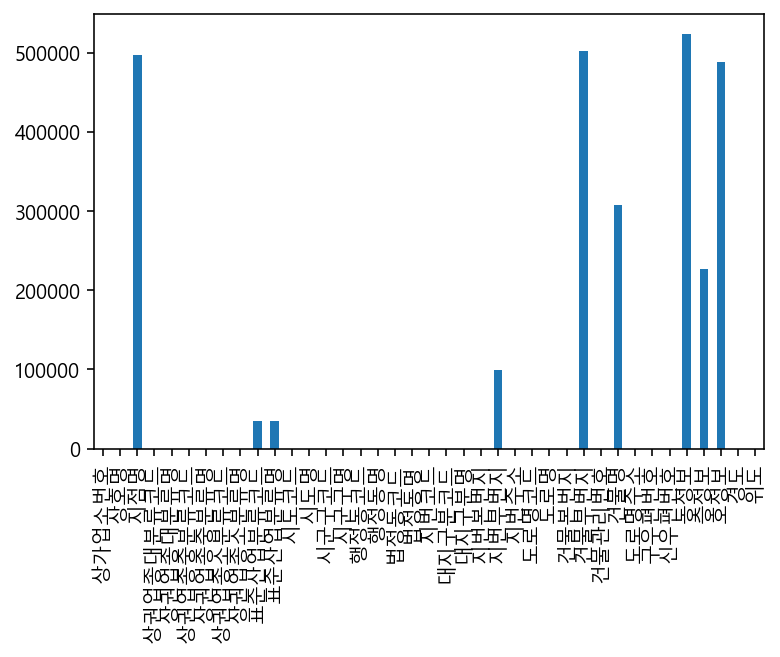

In [16]:
n.plot.bar()

<AxesSubplot:>

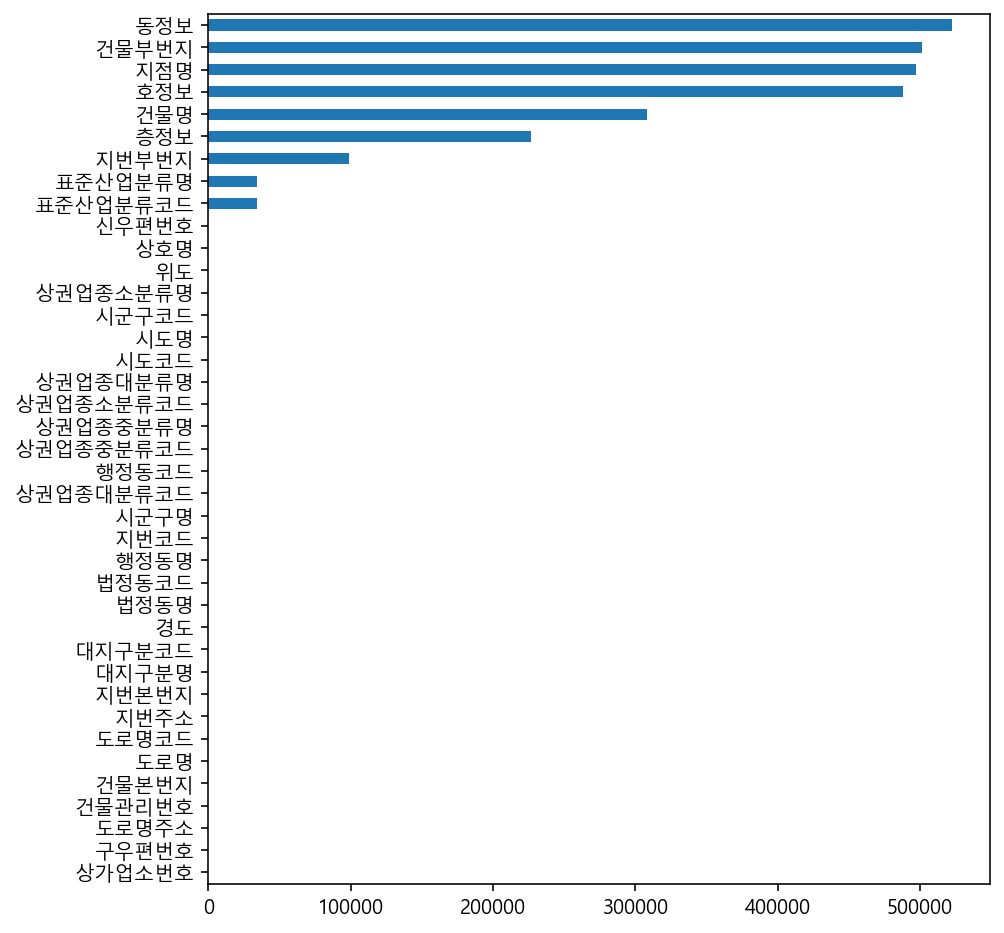

In [17]:
n.sort_values().plot.barh(figsize=(7,8))
#sort_values()값 크기별로 sort

#### 4.2 Missingno로 결측치 시각화

<AxesSubplot:>

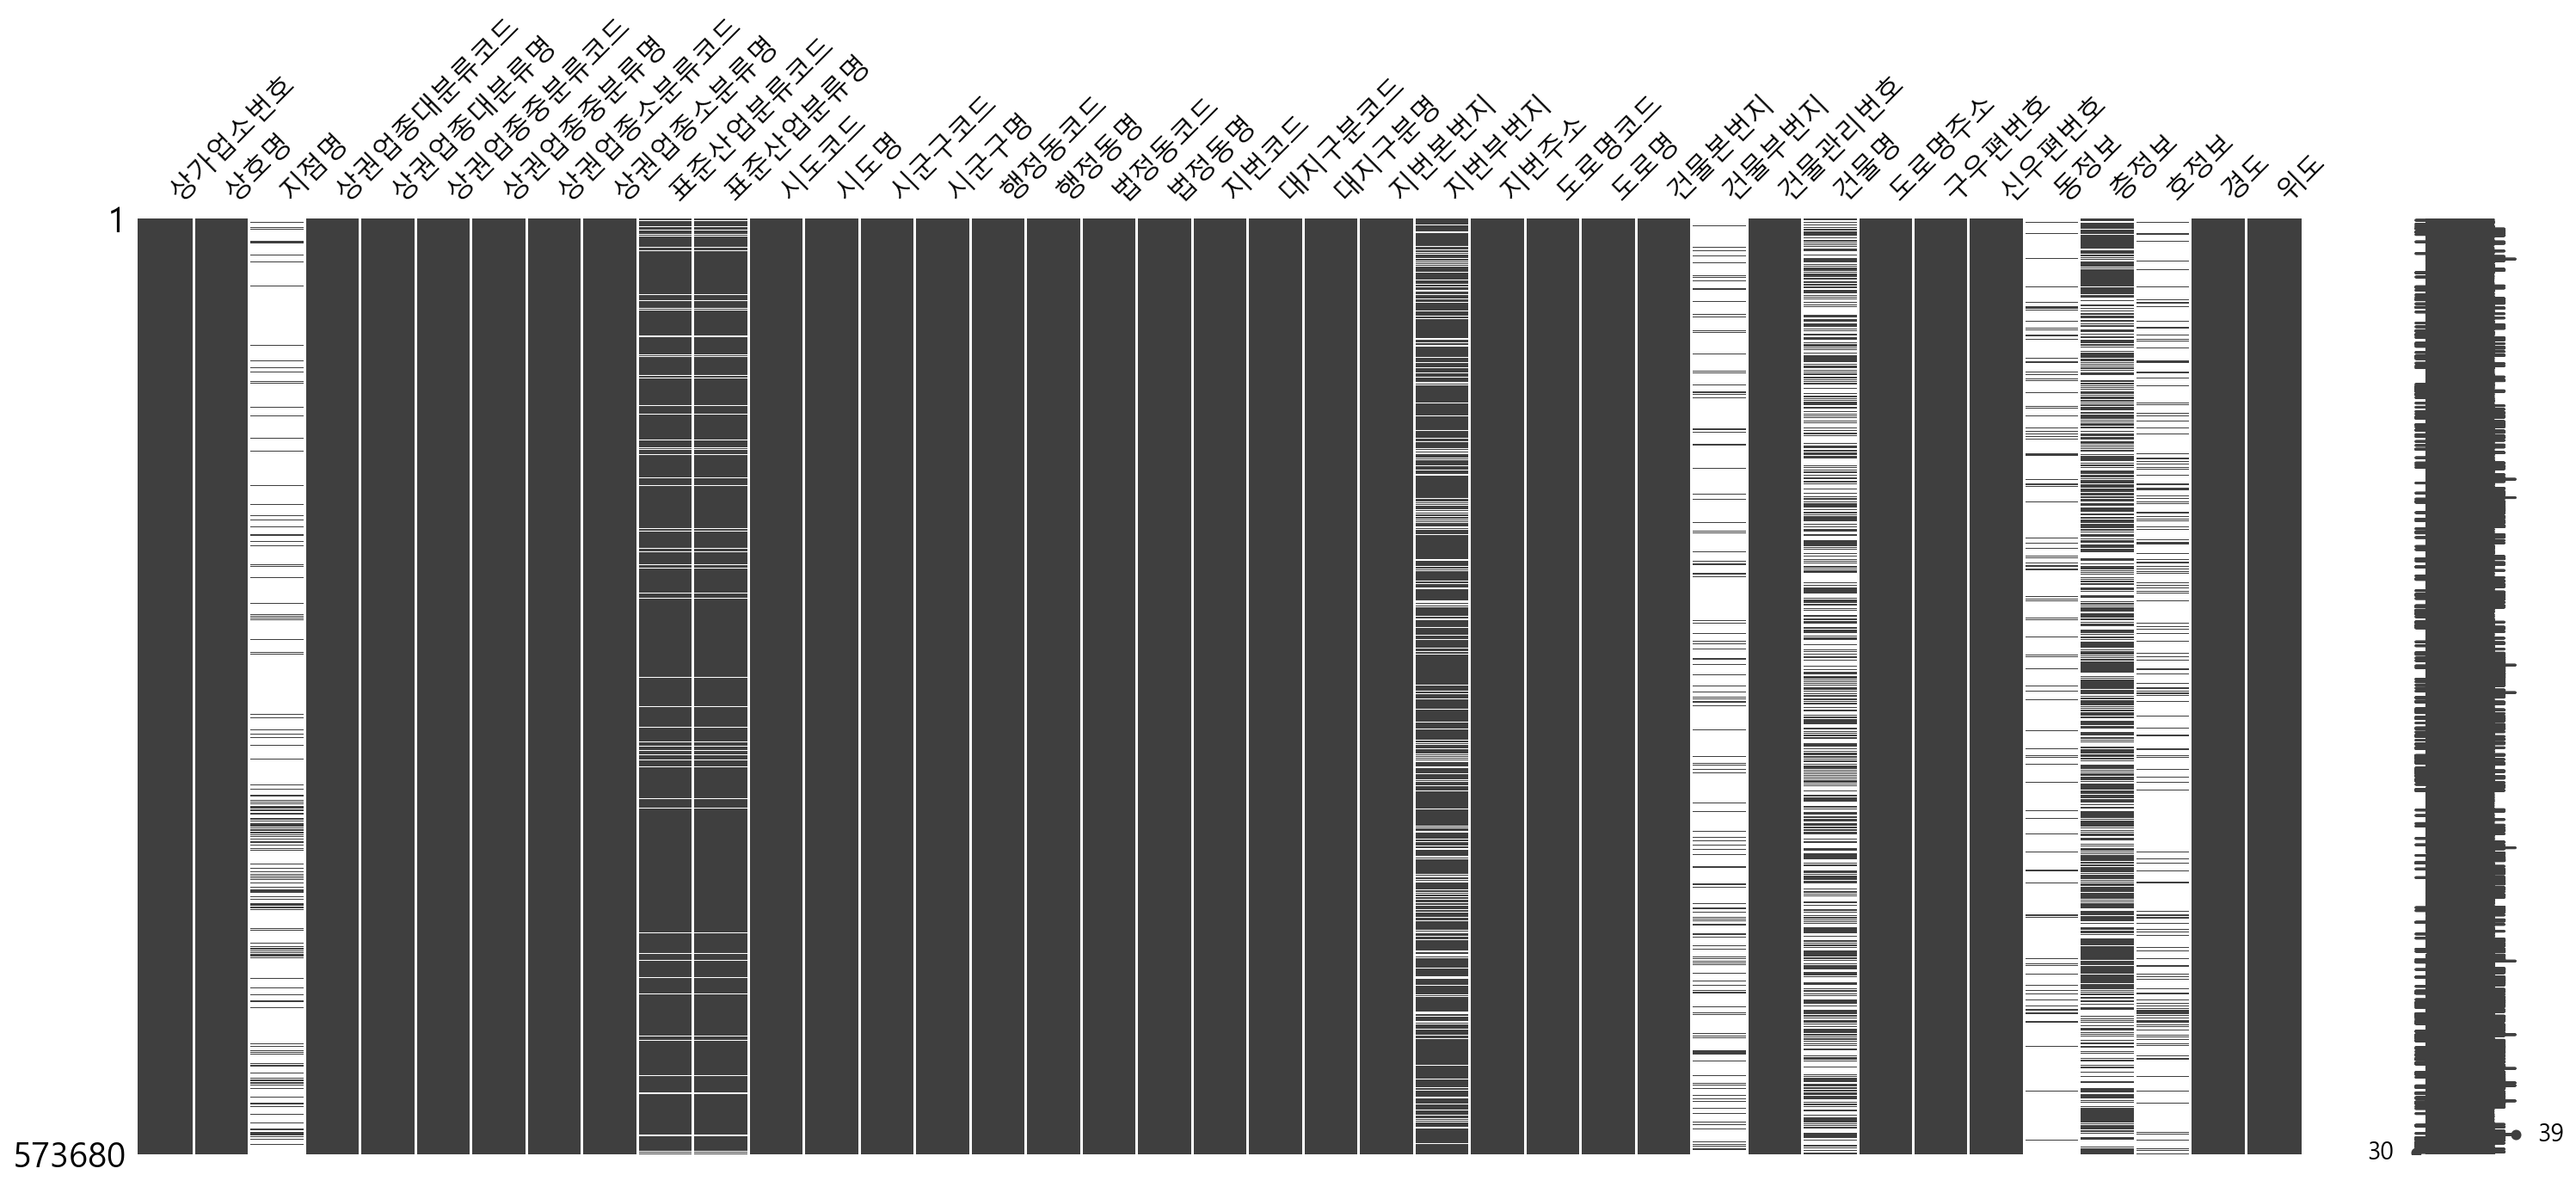

In [18]:
import missingno as msno

msno.matrix(df)

<AxesSubplot:>

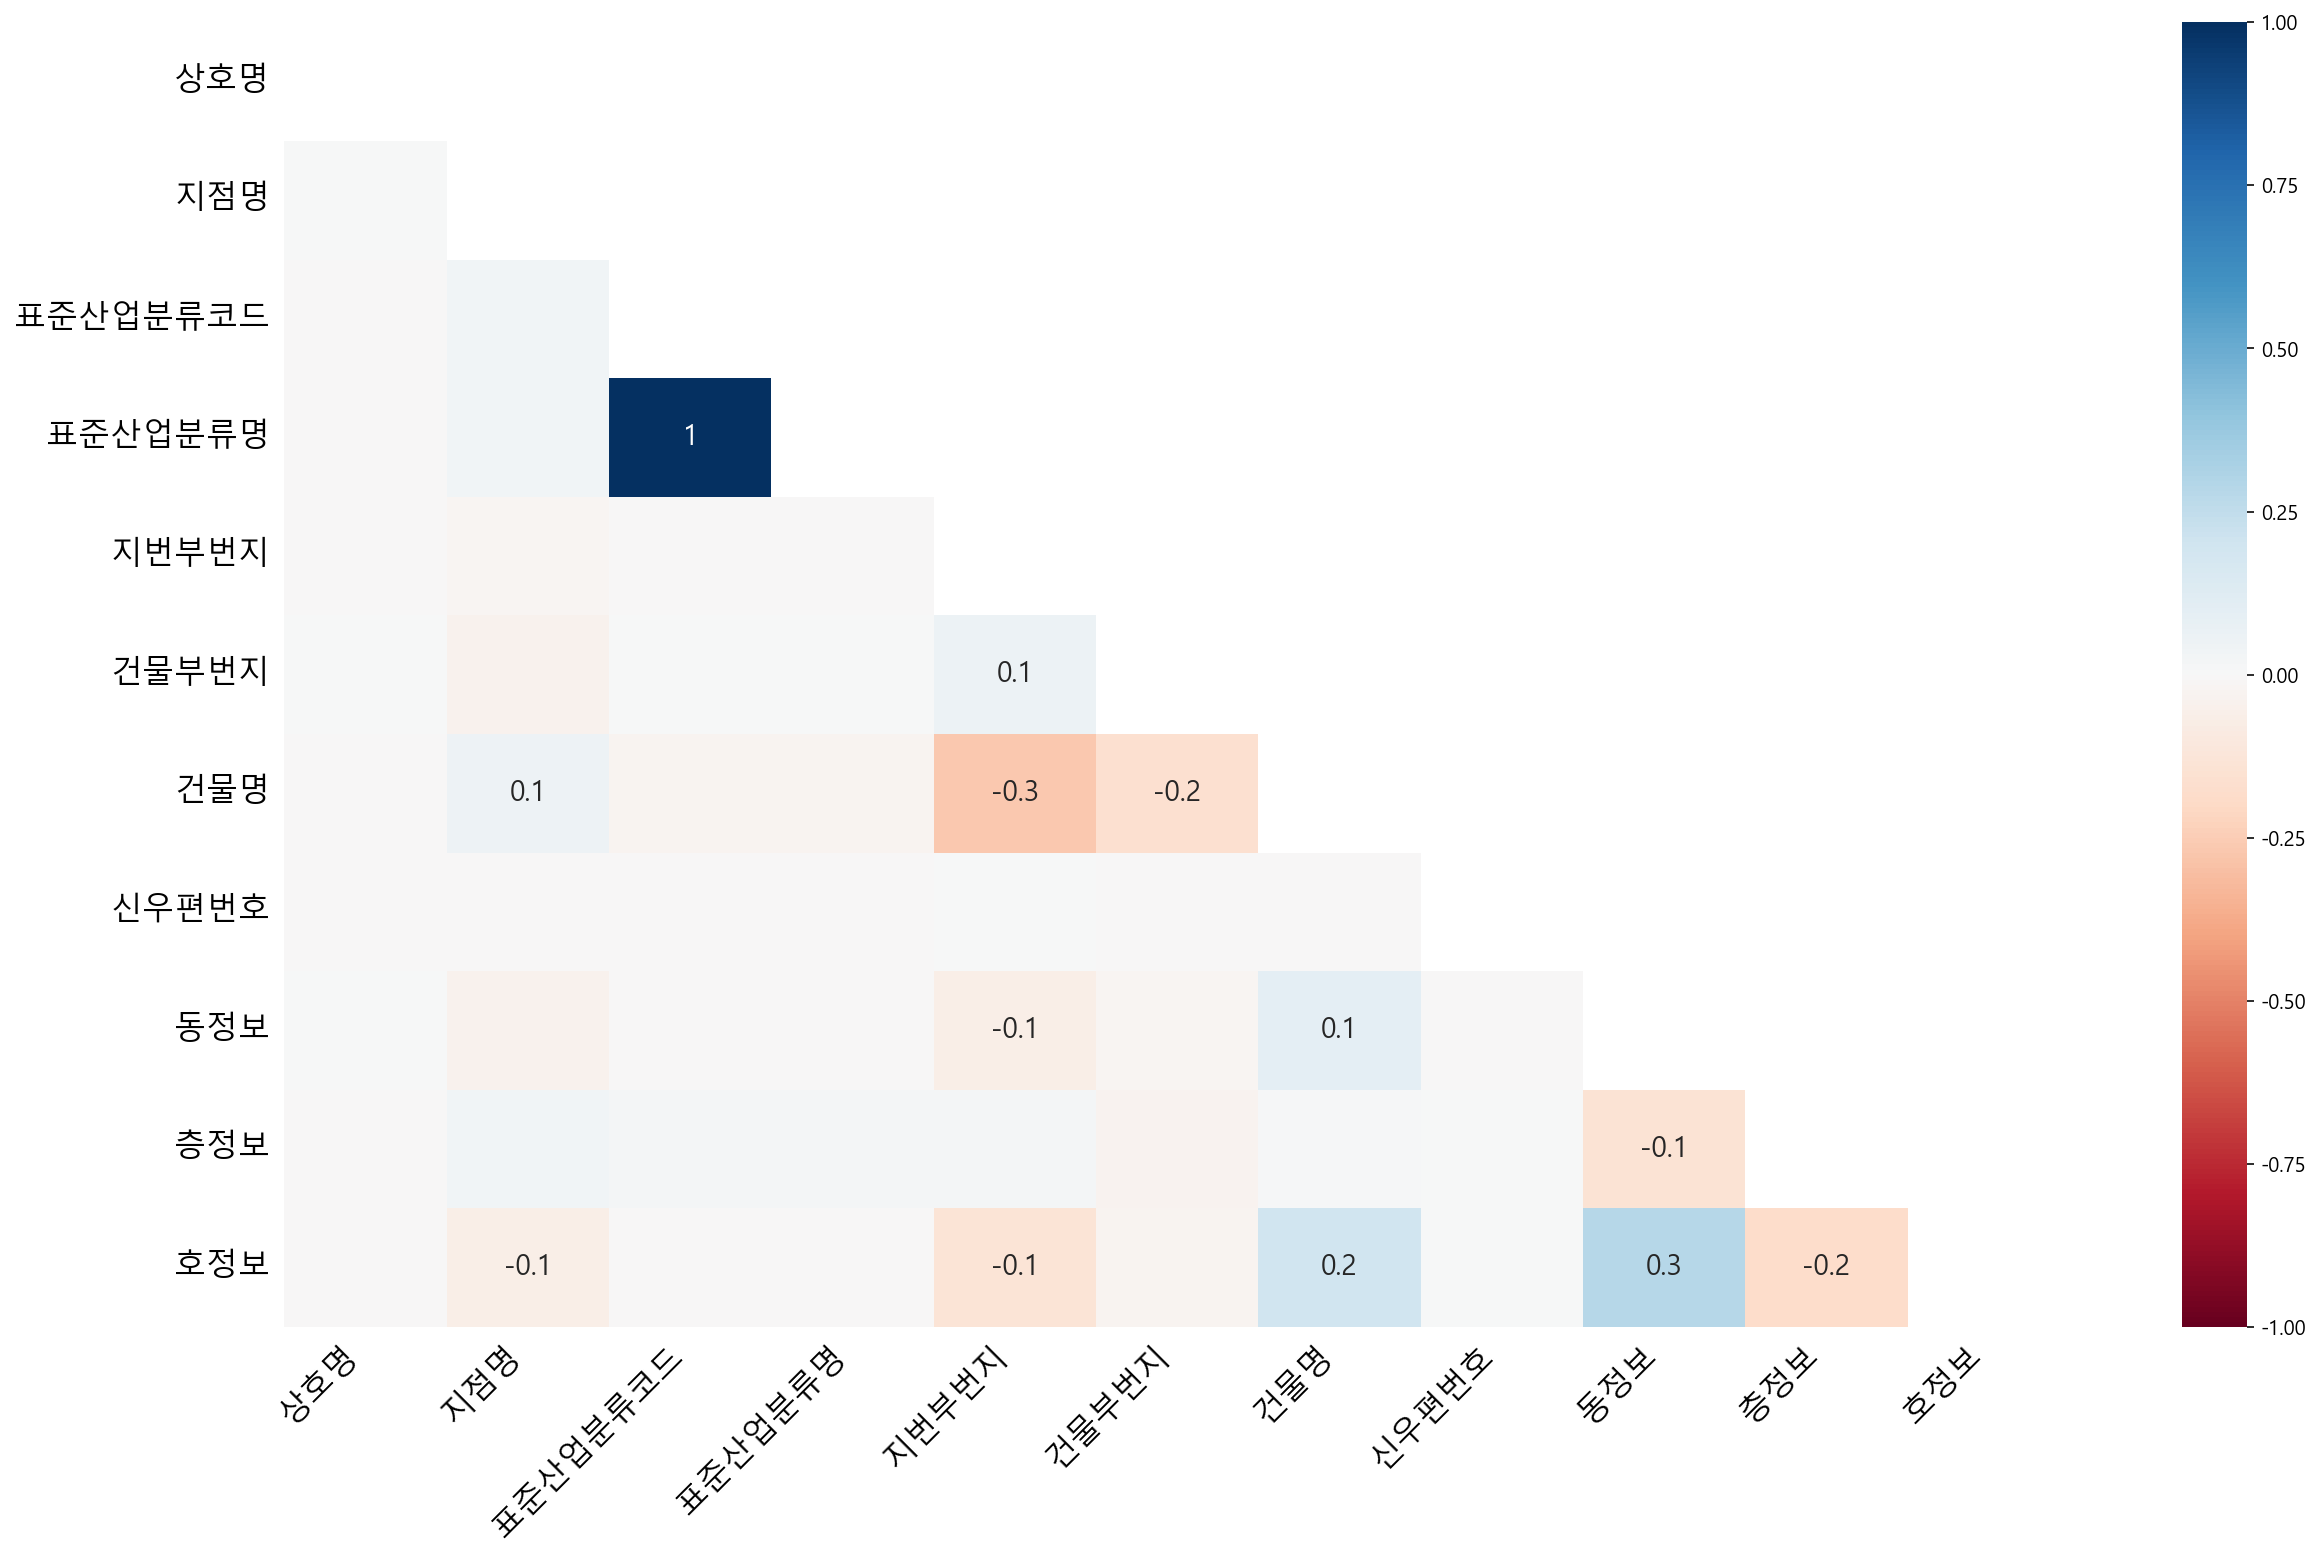

In [45]:
msno.heatmap(df)

<AxesSubplot:>

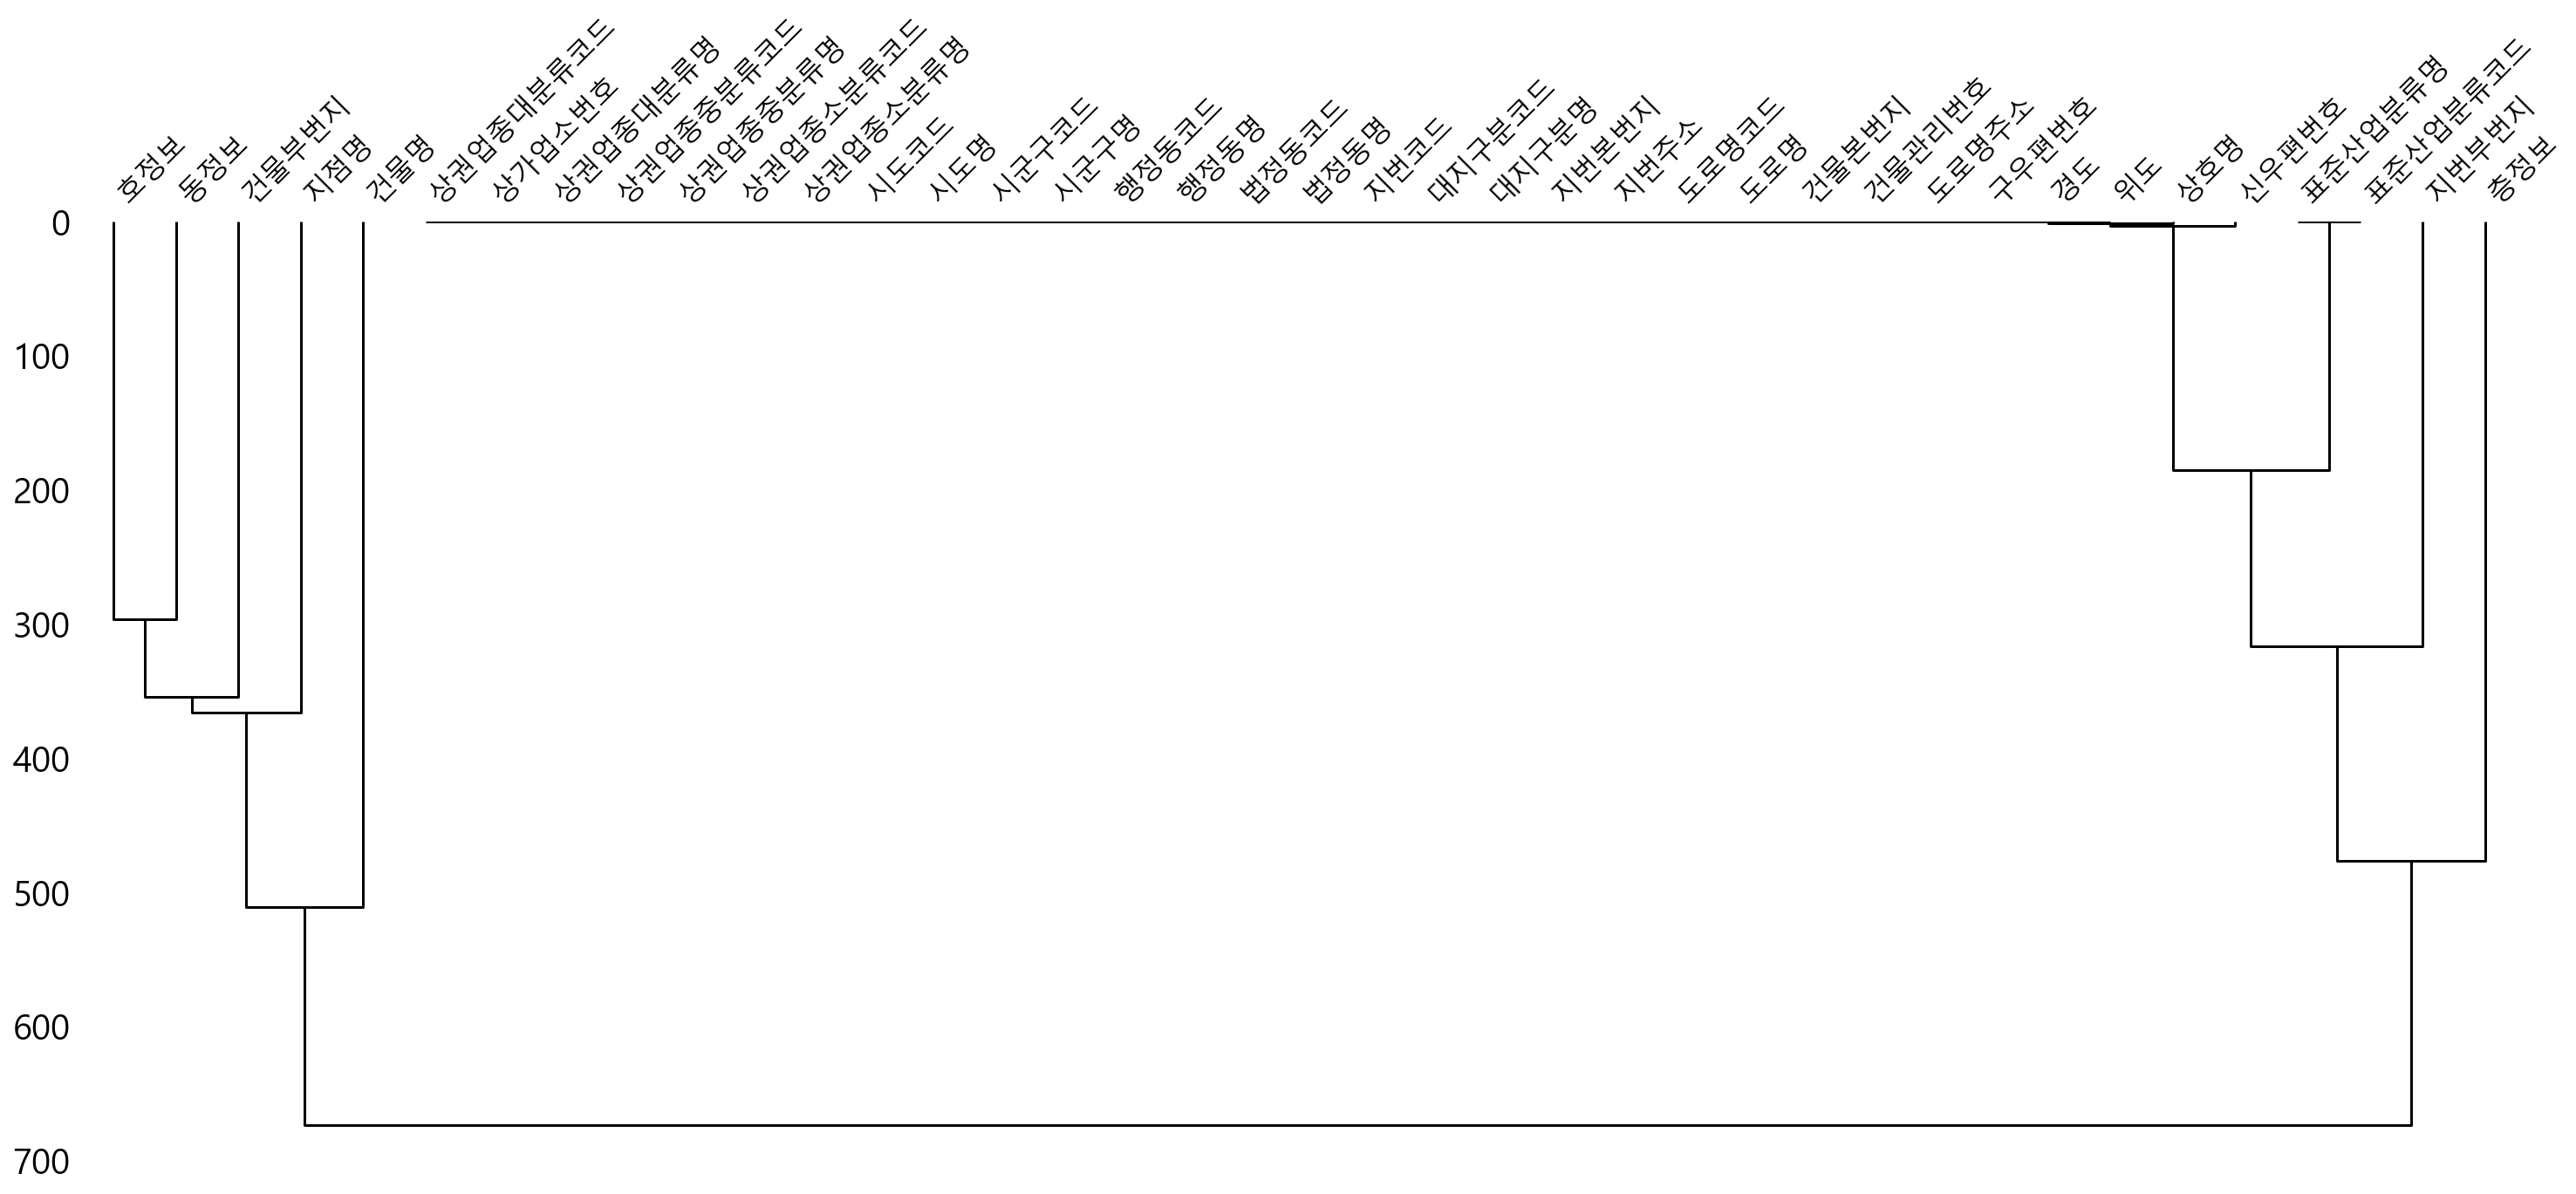

In [46]:
msno.dendrogram(df)

### 5. 사용하지 않는 컬럼 제거하기

#### 5.1 결측치가 너무 많은 컬럼 제거하기 

In [19]:
# 결측치가 많은 순으로 정렬
n.sort_values(ascending=False)

# 그중 9개만 추출 
not_use=n.sort_values(ascending=False).head(9)
not_use_col=not_use.index
not_use_col

Index(['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

In [20]:
#사용하지 않는 컬럼 제거 
df=df.drop(not_use_col, axis=1)
#컬럼을 기준으로 제거 해야하기 떄문에 axis=1 설정(기본값0이어서 행이 기준됨)
print(df.shape) #9개가 제거 됨 

(573680, 30)


In [21]:
df.info()
#메모리 사용량 줄어듬 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   상권업종대분류코드  573680 non-null  object 
 3   상권업종대분류명   573680 non-null  object 
 4   상권업종중분류코드  573680 non-null  object 
 5   상권업종중분류명   573680 non-null  object 
 6   상권업종소분류코드  573680 non-null  object 
 7   상권업종소분류명   573680 non-null  object 
 8   시도코드       573680 non-null  int64  
 9   시도명        573680 non-null  object 
 10  시군구코드      573680 non-null  int64  
 11  시군구명       573680 non-null  object 
 12  행정동코드      573680 non-null  int64  
 13  행정동명       573680 non-null  object 
 14  법정동코드      573680 non-null  int64  
 15  법정동명       573680 non-null  object 
 16  지번코드       573680 non-null  int64  
 17  대지구분코드     573680 non-null  int64  
 18  대지구분명      573680 non-null  object 
 19  지번본번지      573680 non-n

#### 5.2 사용하지 않는 컬럼 제거하기

In [22]:
#컬럼명을 전처리 하기 위해 cols라는 변수에 담기 
cols= df.columns
cols
#코드나 번호가 들어간 컬럼명 제거 

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [23]:
#코드와 번호 텍스트가 들어간 값을 찾기 
cols_code=cols[cols.str.contains('코드|번호')] #코드와 번호가 들어간 값만 남게 됨 
cols_code

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [24]:
#cols-cols_code하기 
df=df.drop(cols_code,axis=1)
print(df.shape)

(573680, 16)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   대지구분명     573680 non-null  object 
 9   지번본번지     573680 non-null  int64  
 10  지번주소      573680 non-null  object 
 11  도로명       573680 non-null  object 
 12  건물본번지     573680 non-null  int64  
 13  도로명주소     573680 non-null  object 
 14  경도        573680 non-null  float64
 15  위도        573680 non-null  float64
dtypes: float64(2), int64(2), object(12)
memory usage: 70.0+ MB


### 6. 행, 열을 기준으로 값을 가져오기 

In [26]:
#상호명 컬럼만 가져오기 
df['상호명' ].head()

0           와라와라호프
1    커피빈코리아선릉로93길점
2             프로포즈
3         싱싱커피&토스트
4         가락사우나내스낵
Name: 상호명, dtype: object

In [27]:
#두개의 컬럼 가져 올떄는 '리스트'형태
df[['상호명','도로명주소' ]]

,상호명,도로명주소
0,와라와라호프,서울특별시 강남구 남부순환로 2933
1,커피빈코리아선릉로93길점,서울특별시 강남구 선릉로93길 6
2,프로포즈,서울특별시 금천구 가산로 34-6
3,싱싱커피&토스트,부산광역시 사상구 괘감로 37
4,가락사우나내스낵,서울특별시 송파구 가락로 71
...,...,...
573675,비파티세리공덕,서울특별시 마포구 마포대로14길 4
573676,앤탑PC방,서울특별시 성동구 성수일로8길 37
573677,오즈아레나PC방,서울특별시 강남구 강남대로 492
573678,파인트리네일,서울특별시 영등포구 국제금융로 10


In [28]:
df.loc[0]

상호명                       와라와라호프
상권업종대분류명                      음식
상권업종중분류명                    유흥주점
상권업종소분류명                   호프/맥주
시도명                        서울특별시
시군구명                         강남구
행정동명                        대치1동
법정동명                         대치동
대지구분명                         대지
지번본번지                        604
지번주소           서울특별시 강남구 대치동 604
도로명              서울특별시 강남구 남부순환로
건물본번지                       2933
도로명주소       서울특별시 강남구 남부순환로 2933
경도                    127.061026
위도                     37.493922
Name: 0, dtype: object

In [29]:
df.loc[[0,1,2]]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,대지,162,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로,34,서울특별시 금천구 가산로 34-6,126.899220,37.471711


In [30]:
#0번쨰 행의 상호명 가져오기 
df.loc[0,'상호명']

'와라와라호프'

In [31]:
df.loc[[0,1,2],['상호명','도로명']]

,상호명,도로명
0,와라와라호프,서울특별시 강남구 남부순환로
1,커피빈코리아선릉로93길점,서울특별시 강남구 선릉로93길
2,프로포즈,서울특별시 금천구 가산로


#### iloc로 슬라이싱을 통해 가져오기 
- df.iloc[:] 전체데이터 가져옴 
- df.iloc[행, 열]

In [32]:
#위에서 5개 행과 왼쪽에서 5개 열 가져오기 
df.iloc[:5,:5]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시


In [33]:
#끝에서 5개 행과 왼쪽에서 5개 열 가져오기 

df.iloc[-5:,-5:]

,도로명,건물본번지,도로명주소,경도,위도
573675,서울특별시 마포구 마포대로14길,4,서울특별시 마포구 마포대로14길 4,126.955059,37.548618
573676,서울특별시 성동구 성수일로8길,37,서울특별시 성동구 성수일로8길 37,127.054615,37.545853
573677,서울특별시 강남구 강남대로,492,서울특별시 강남구 강남대로 492,127.024102,37.506202
573678,서울특별시 영등포구 국제금융로,10,서울특별시 영등포구 국제금융로 10,126.924863,37.525172
573679,서울특별시 도봉구 도봉로114길,22,서울특별시 도봉구 도봉로114길 22-8,127.035145,37.647099


### 6. 기술통계값

In [34]:
df.describe()

,지번본번지,건물본번지,경도,위도
count,573680.000000,573680.000000,573680.000000,573680.000000
mean,469.281810,153.912094,127.596287,36.854698
std,484.778049,276.980935,0.941262,1.081285
min,1.000000,0.000000,126.768169,35.006760
25%,109.000000,20.000000,126.968316,35.215422
50%,335.000000,50.000000,127.047672,37.511207
75%,678.000000,172.000000,128.986938,37.560362
max,9999.000000,3318.000000,129.292243,37.692398


In [35]:
#필요한 컬럼에 대해 요약 >위도 경고 
df[['위도','경도']].describe

<bound method NDFrame.describe of                위도          경도
0       37.493922  127.061026
1       37.505675  127.047883
2       37.471711  126.899220
3       35.159774  128.980455
4       37.500249  127.104071
...           ...         ...
573675  37.548618  126.955059
573676  37.545853  127.054615
573677  37.506202  127.024102
573678  37.525172  126.924863
573679  37.647099  127.035145

[573680 rows x 2 columns]>

In [78]:
#결측치를 제외한 값의 갯수를 계산 
df['위도'].count()

573680

In [82]:
#평균
df['위도'].mean()



36.85469787421801

In [81]:
#중앙값
df['위도'].median()

37.5112070048312

In [83]:
#분산 : 평균에 얼마나 떨어져있는지
df['위도'].var()

1.1691762199811804

#### 6.1 단변량 수치형 변수 시각화

C:\Users\sun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='위도', ylabel='Density'>

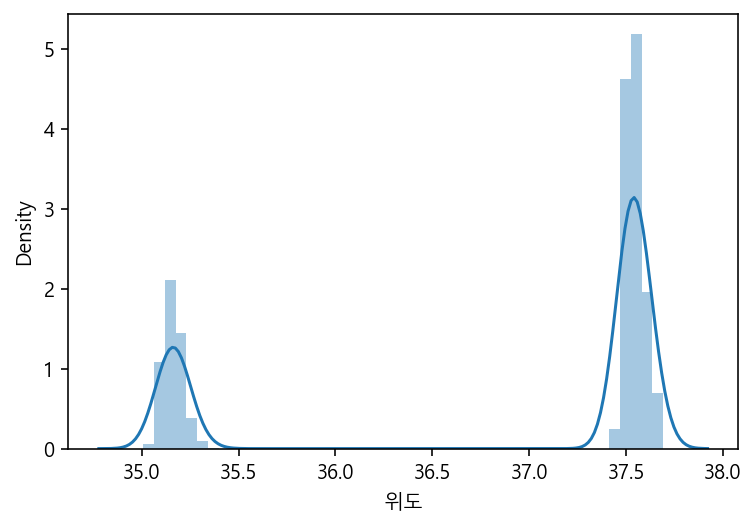

In [84]:
#위도의 distplot

sns.distplot(df['위도'])
#왼쪽 부산, 오른쪽 서울 

C:\Users\sun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='경도', ylabel='Density'>

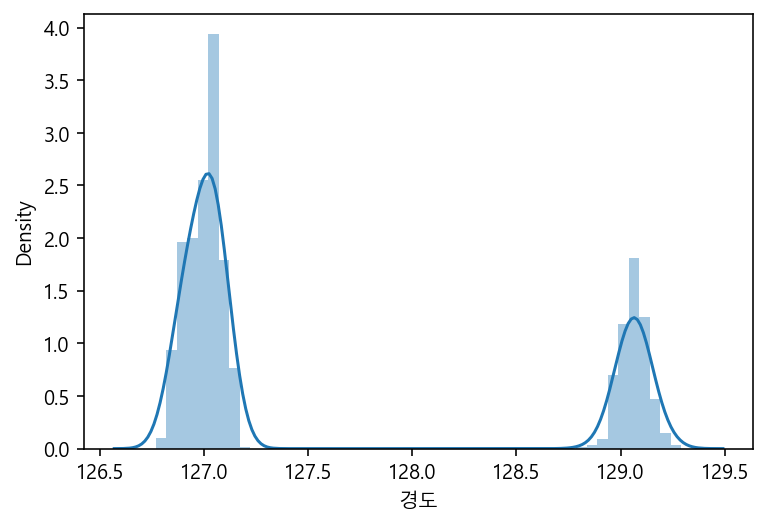

In [85]:
#경도의 distplot

sns.distplot(df['경도'])

C:\Users\sun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='위도', ylabel='Density'>

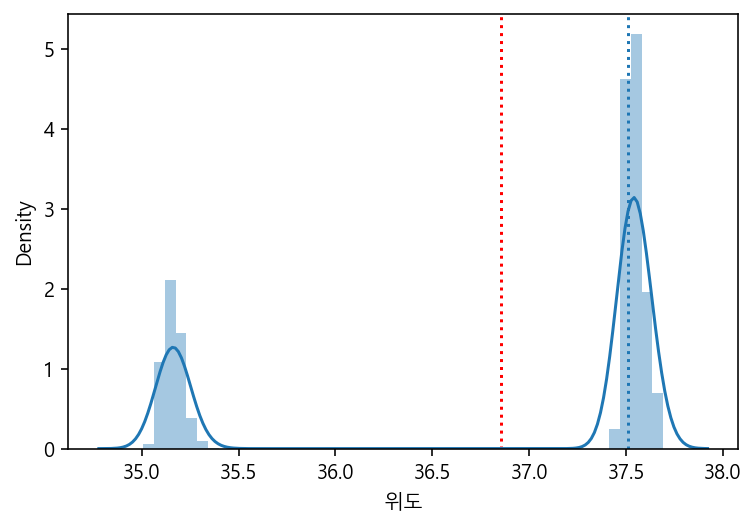

In [89]:
#위도의 평균, 중앙값을 표현하고color로 선의 색상을  linestyle점선으로 표시
plt.axvline(df['위도'].mean(),linestyle=':',color='r')
plt.axvline(df['위도'].median(),linestyle=':')
sns.distplot(df['위도'])

#### 6.2 상관계수 // 이변량 수치형 데이터 분석

In [36]:
#각 변수의 상관계수 
corr=df.corr()
corr

,지번본번지,건물본번지,경도,위도
지번본번지,1.000000,0.057987,0.182678,-0.196658
건물본번지,0.057987,1.000000,0.000255,0.004606
경도,0.182678,0.000255,1.000000,-0.994711
위도,-0.196658,0.004606,-0.994711,1.000000


<AxesSubplot:>

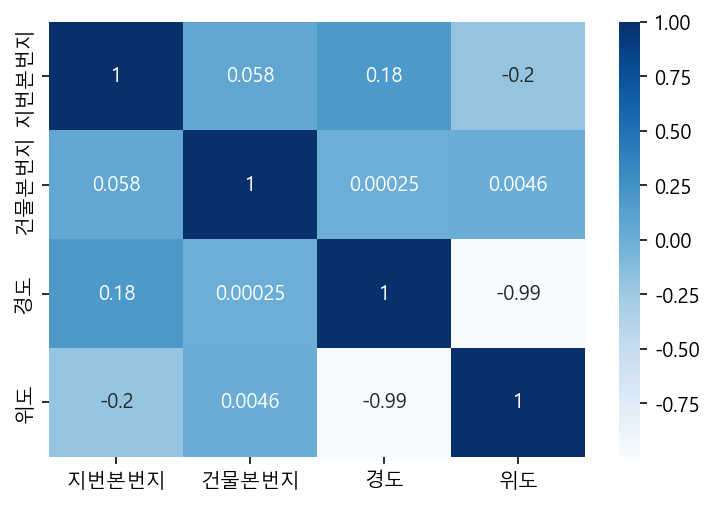

In [37]:
#위에서 구한 상관계수 시각화 
sns.heatmap(corr, annot=True,cmap="Blues")


<AxesSubplot:xlabel='경도', ylabel='위도'>

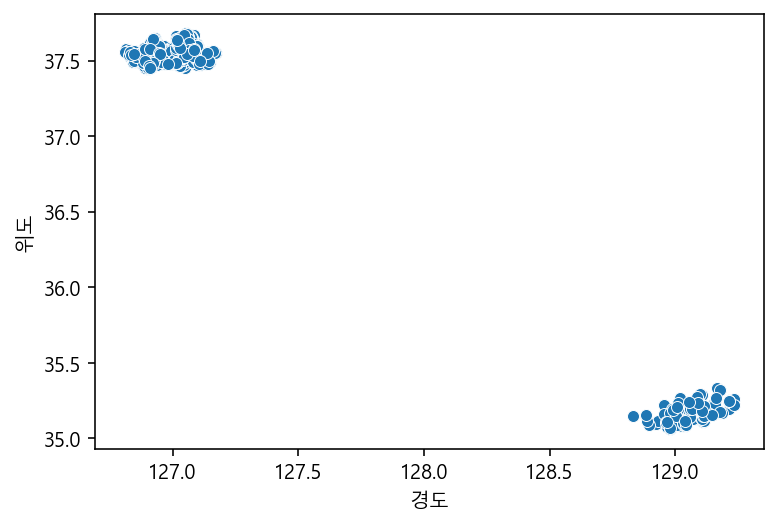

In [101]:
sns.scatterplot(data=df.sample(1000),x='경도',y='위도')

<AxesSubplot:xlabel='경도', ylabel='위도'>

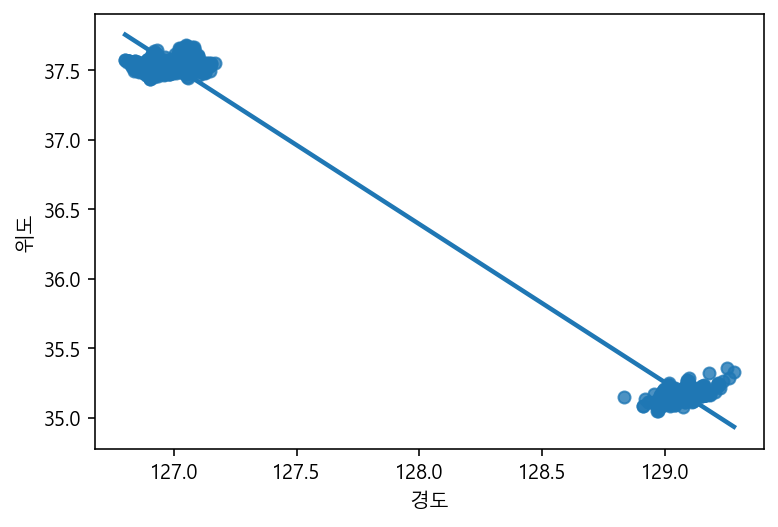

In [102]:
#위 시각화에 회귀선 그리기
sns.regplot(data=df.sample(1000),x='경도',y='위도')
#강한 음의 상관관계를 가짐 

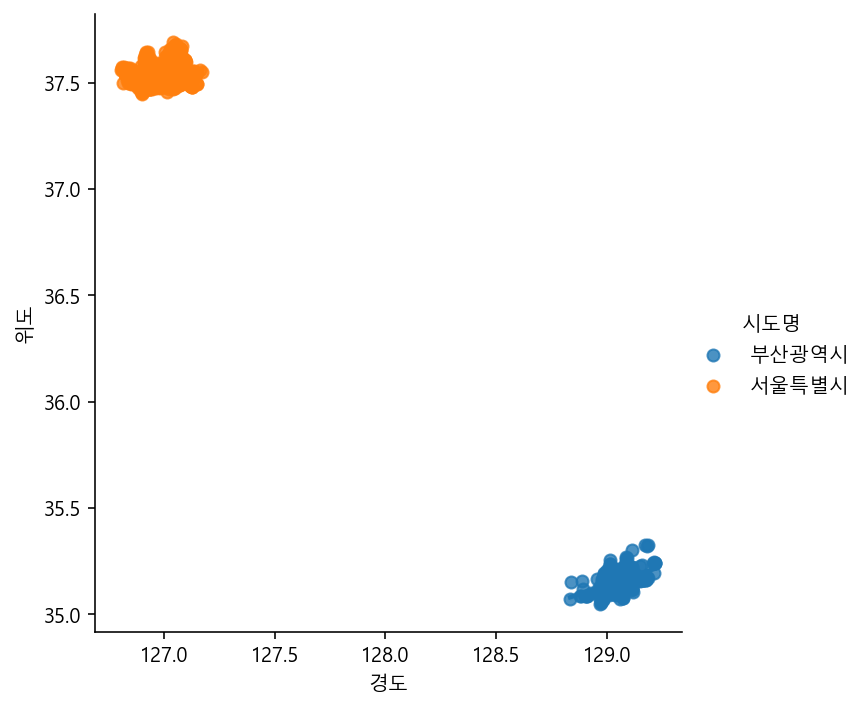

In [103]:
sns.lmplot(data=df.sample(1000),x='경도',y='위도',hue='시도명')
#서울하고 부산만 봤을떄 서로 상관관계는 없어보임 

#### 6.3 object 타입의 데이터 요약 

In [38]:
#문자열 데이터 요약하기 
df.describe(include='object')

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,573679,573680,573680,573680,573680,573680,573680,573680,573680,573680,573680,573680
unique,378758,9,94,709,2,39,629,648,2,190237,18001,190486
top,점프셈교실,음식,한식,한식/백반/한정식,서울특별시,강남구,역삼1동,역삼동,대지,부산광역시 부산진구 부전동 503-15,서울특별시 서초구 신반포로,부산광역시 부산진구 가야대로 772
freq,2297,185516,59725,38133,407376,47080,10400,12102,572913,1058,3543,1058


In [39]:
#상권업종대분류명의 요약값보기
df['상권업종대분류명'].describe()

count     573680
unique         9
top           음식
freq      185516
Name: 상권업종대분류명, dtype: object

In [40]:
df['상권업종대분류명'].unique()

array(['음식', '생활서비스', '소매', '의료', '학문/교육', '관광/여가/오락', '부동산', '숙박', '스포츠'],
      dtype=object)

In [41]:
#유니크값 구하기 
len(df['상권업종대분류명'].unique())
#len(df['상권업종대분류명'].nunique())

9

In [42]:
df['상권업종대분류명'].value_counts()

음식          185516
소매          179460
생활서비스        97789
학문/교육        42477
의료           25509
부동산          20918
관광/여가/오락     16377
숙박            5327
스포츠            307
Name: 상권업종대분류명, dtype: int64

### 7. 인덱싱과 필터로 서브셋 만들기

In [47]:
#'상권업종대분류명'이 음식인 데이터만 가져오기 
#새로운 변수에 담을떄 copy()를하고 만들어주기!

df_food= df[df['상권업종대분류명']=='음식'].copy()


#### 7.1 강남구이 상권 업종 대분류가 음식만 보기 

In [48]:
#시군구명이 '강남구'인 데이터만 가져오기
df[df['시군구명']=='강남구'].head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
26,쉼터,음식,분식,라면김밥분식,서울특별시,강남구,삼성1동,삼성동,대지,159,서울특별시 강남구 삼성동 159,서울특별시 강남구 봉은사로,524,서울특별시 강남구 봉은사로 524,127.057100,37.512939
27,배제현의웰빙낙지한마리수제비,음식,일식/수산물,낙지/오징어,서울특별시,강남구,신사동,신사동,대지,512,서울특별시 강남구 신사동 512-13,서울특별시 강남구 강남대로152길,19,서울특별시 강남구 강남대로152길 19,127.020945,37.517574
38,타워광명내과의원,의료,병원,내과/외과,서울특별시,강남구,도곡2동,도곡동,대지,467,서울특별시 강남구 도곡동 467-14,서울특별시 강남구 언주로30길,39,서울특별시 강남구 언주로30길 39,127.053198,37.488742


In [52]:
#시군구명이 강남구이고 상권업종 대분류명이 음식인 서브셋 가져온후 
#상권업종중분류명 별로 빈도수를 구하기 

df[(df['시군구명']=='강남구')| (df['상권업종대분류명']=='음식')]['상권업종중분류명'].value_counts()

한식          59725
유흥주점        24017
커피점/카페      23901
분식          17454
일식/수산물      15220
            ...  
운영관리시설          3
실외운동시설          2
스포츠/운동          1
부동산관련서비스        1
종교용품판매          1
Name: 상권업종중분류명, Length: 93, dtype: int64

In [55]:
#위와 똑같이 구하지만 이번에는 loc사용하기
#loc(행,열)

df.loc[(df['시군구명']=='강남구')& (df['상권업종대분류명']=='음식'),'상권업종중분류명'].value_counts()

한식         4371
커피점/카페     2790
유흥주점       1573
양식         1573
일식/수산물     1255
분식         1197
패스트푸드       786
제과제빵떡케익     650
닭/오리요리      539
중식          358
별식/퓨전요리     341
부페           63
기타음식업        47
음식배달서비스      11
Name: 상권업종중분류명, dtype: int64

#### 7.2 구별 음식점 업종 비교하기 


In [61]:
#df_seoul_food에 시도명이 서울특별시이고 상권업종대분류명이 음식에 대한 서브셋 가져오기 

df_seoul_food=df[(df['시도명']=='서울특별시')&(df['상권업종대분류명']=='음식')].copy()
df_seoul_food.shape

(132889, 16)

In [69]:
#시군구명 상권업종분류명으로 그룹화해서 상점수를 세어보자 

food_gu=df_seoul_food.groupby(['시군구명','상권업종중분류명'])['상호명'].count()
food_gu.head()

시군구명  상권업종중분류명
강남구   기타음식업         47
      닭/오리요리       539
      별식/퓨전요리      341
      부페            63
      분식          1197
Name: 상호명, dtype: int64

In [73]:
food_gu.unstack().iloc[:5,:5]

상권업종중분류명,기타음식업,닭/오리요리,별식/퓨전요리,부페,분식
시군구명,,,,,
강남구,47.0,539.0,341.0,63.0,1197.0
강동구,4.0,318.0,138.0,24.0,509.0
강북구,2.0,208.0,97.0,6.0,329.0
강서구,16.0,323.0,145.0,21.0,531.0
관악구,11.0,324.0,118.0,11.0,461.0


<AxesSubplot:xlabel='상권업종중분류명'>

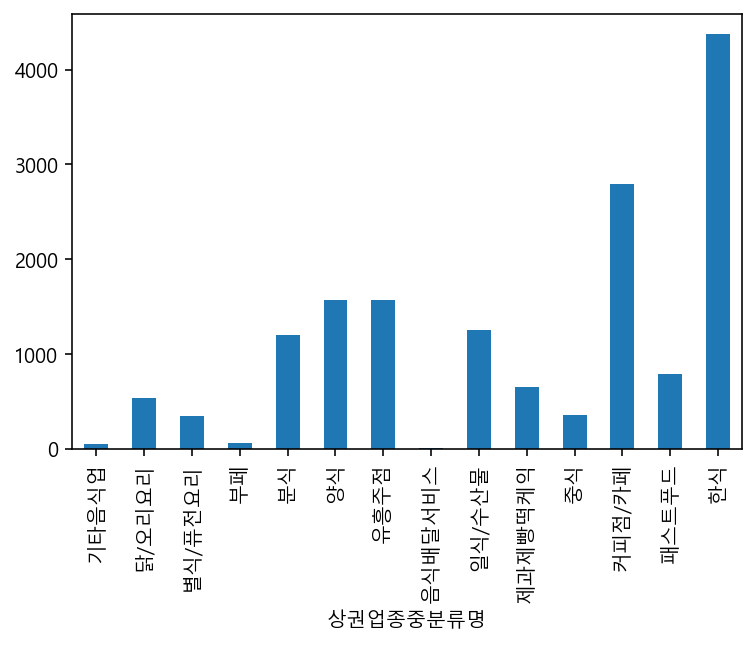

In [72]:
#food_gu시각화 
#상군업종분류명과 상점수로 barplot그리기

food_gu.unstack().loc['강남구'].plot.bar()

In [88]:
food=food_gu.reset_index()
food=food.rename(columns={'상호명':'상호수'})
food

,시군구명,상권업종중분류명,상호수
0,강남구,기타음식업,47
1,강남구,닭/오리요리,539
2,강남구,별식/퓨전요리,341
3,강남구,부페,63
4,강남구,분식,1197
...,...,...,...
343,중랑구,제과제빵떡케익,160
344,중랑구,중식,78
345,중랑구,커피점/카페,311
346,중랑구,패스트푸드,127


<AxesSubplot:xlabel='상권업종중분류명', ylabel='상호수'>

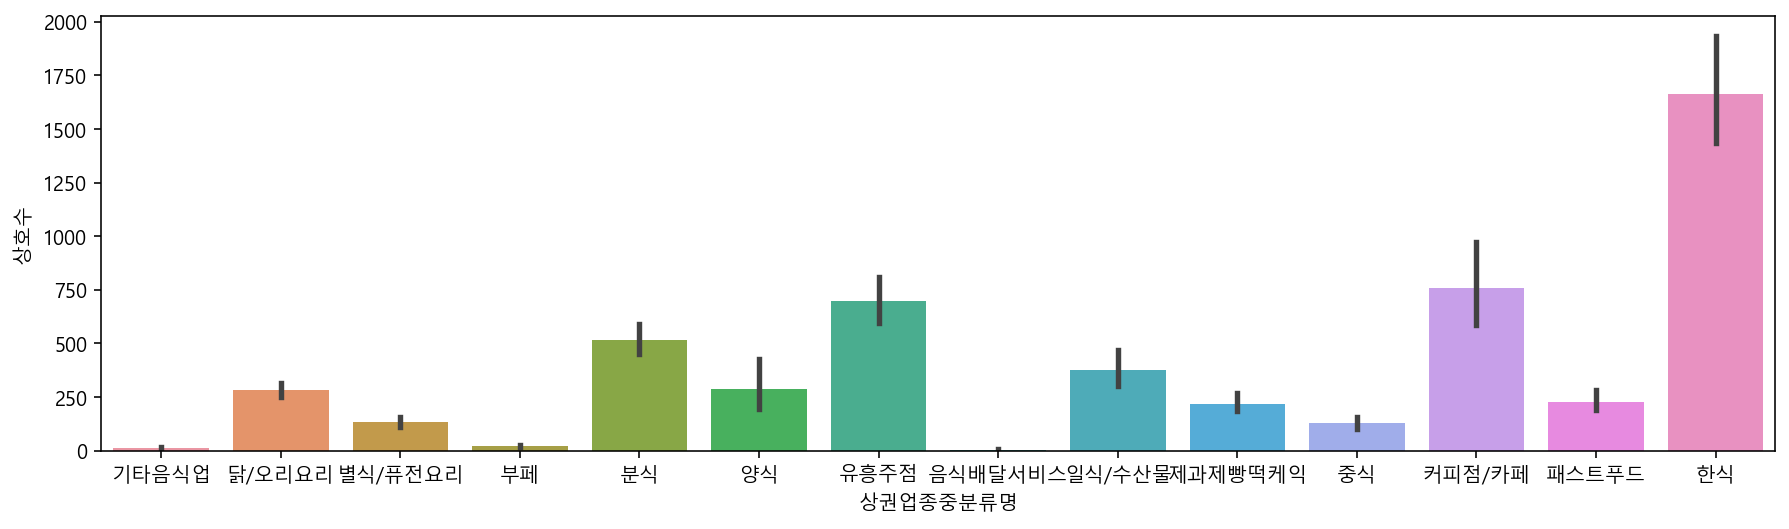

In [90]:
plt.figure(figsize=(15,4))
sns.barplot(data=food, x='상권업종중분류명',y='상호수')

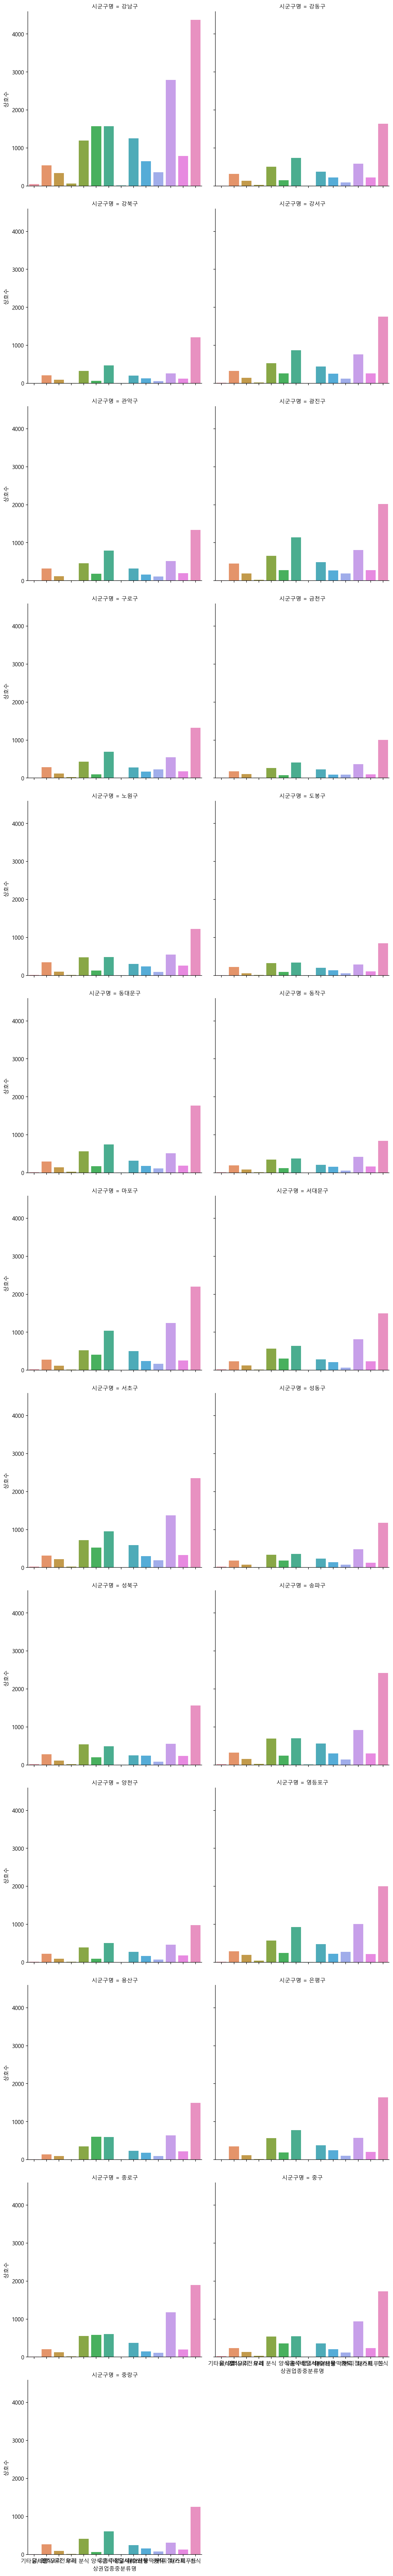

In [93]:
sns.catplot(data=food, x='상권업종중분류명',y='상호수',kind='bar',col='시군구명',col_wrap=2)

### 8.  구별 학원수 비교

#### 8.1 서브셋 만들고 집계

In [96]:
#학원의 분류명을 알아보기 위해 '상권업종대분류명'의 unique값을 추출 

df['상권업종대분류명'].unique()

array(['음식', '생활서비스', '소매', '의료', '학문/교육', '관광/여가/오락', '부동산', '숙박', '스포츠'],
      dtype=object)

In [98]:
#시도명이 서울특별시이고 상권업종대분류명이 학문인 데이터 가져오기 

df_academy=df[(df['시도명']=='서울특별시')&(df['상권업종대분류명']=='학문/교육')].copy()


85         639
101        905
121        184
126       1283
134        818
          ... 
573529     106
573654     447
573656      76
573661     721
573662     327
Name: 지번본번지, Length: 31509, dtype: int64

In [99]:
#상호명 빈도수를 구한다.
df_academy['상호명'].value_counts()

점프셈교실        1659
해법수학           57
윤선생영어교실        34
뮤엠영어           27
해법영어교실         24
             ... 
이룸해법수학교습소       1
두꺼비철학관          1
수학사랑            1
류샘학원            1
아소비             1
Name: 상호명, Length: 24616, dtype: int64

In [100]:
#시군구명으로 빈도수구하기 
df_academy['시군구명'].value_counts()

강남구     4005
서초구     2103
양천구     1881
광진구     1848
송파구     1797
강동구     1585
노원구     1582
강서구     1498
은평구     1333
관악구     1313
성북구     1246
구로구     1140
동대문구    1051
동작구     1050
마포구     1007
영등포구     984
도봉구      931
중랑구      884
서대문구     773
성동구      742
금천구      701
종로구      638
강북구      513
용산구      491
중구       413
Name: 시군구명, dtype: int64

In [108]:
academy_count=df_academy['상권업종소분류명'].value_counts().head(30)

In [112]:
#빈도수가 1000개 이상인것만 따로 변수에 할당
academy_count_1000=academy_count[academy_count>1000]
academy_count_1000

학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
서예/서화/미술       1595
독서실            1096
고시원            1062
Name: 상권업종소분류명, dtype: int64

In [120]:
academy_group=df_academy.groupby(['시군구명','상권업종소분류명'])['상호명'].count()
academy_group

시군구명  상권업종소분류명   
강남구   검도도장             9
      고시원            139
      놀이방              8
      독서실            125
      서예/서화/미술       219
                    ... 
중랑구   학원-입시          172
      학원-주산암산부기속셈      7
      학원-펜글씨/한문        1
      학원/국가고시          2
      합기도장             2
Name: 상호명, Length: 1118, dtype: int64

In [122]:
t=academy_group.reset_index()
t=t.rename(columns={'상호명':'상호수'})
t

,시군구명,상권업종소분류명,상호수
0,강남구,검도도장,9
1,강남구,고시원,139
2,강남구,놀이방,8
3,강남구,독서실,125
4,강남구,서예/서화/미술,219
...,...,...,...
1113,중랑구,학원-입시,172
1114,중랑구,학원-주산암산부기속셈,7
1115,중랑구,학원-펜글씨/한문,1
1116,중랑구,학원/국가고시,2


#### 8.2 seaborn으로 시각화하기

<AxesSubplot:xlabel='시군구명', ylabel='상호수'>

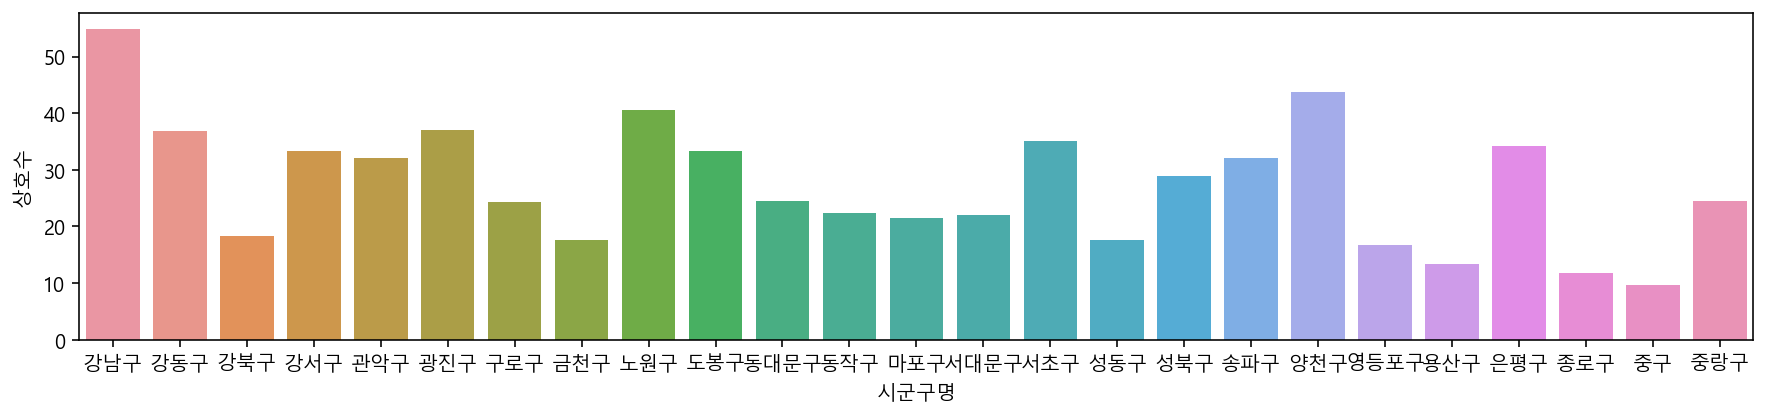

In [125]:
plt.figure(figsize=(15,3))
sns.barplot(data=t,x='시군구명',y='상호수',ci=None)
#ci검은색 선은 신뢰구간

#### 8.3 isin을 사용해 서브셋 만들기 

In [130]:
#isin으로 빈도수를 계산 했을떄 1000개 이상인 데이터만 가져오기

df_academy_selected=df_academy[df_academy['상권업종소분류명'].isin(academy_count_1000.index)].copy()
df_academy_selected

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
101,안재형영어,학문/교육,학원-어학,학원-외국어/어학,서울특별시,양천구,목5동,목동,대지,905,서울특별시 양천구 목동 905-34,서울특별시 양천구 목동서로,133,서울특별시 양천구 목동서로 133-2,126.875973,37.531592
121,정아트,학문/교육,학원-음악미술무용,서예/서화/미술,서울특별시,강서구,염창동,염창동,대지,184,서울특별시 강서구 염창동 184-8,서울특별시 강서구 양천로73가길,21,서울특별시 강서구 양천로73가길 21,126.873645,37.550924
134,아트인스튜디오,학문/교육,학원-음악미술무용,서예/서화/미술,서울특별시,강남구,역삼1동,역삼동,대지,818,서울특별시 강남구 역삼동 818-1,서울특별시 강남구 강남대로96길,12,서울특별시 강남구 강남대로96길 12,127.028054,37.499729
151,삼익피아노강동대리점,학문/교육,학원-음악미술무용,피아노/바이올린/기타,서울특별시,강동구,천호3동,천호동,대지,410,서울특별시 강동구 천호동 410-105,서울특별시 강동구 진황도로,18,서울특별시 강동구 진황도로 18,127.129075,37.539262
153,파랑새어린이집,학문/교육,유아교육,어린이집,서울특별시,도봉구,창1동,창동,대지,374,서울특별시 도봉구 창동 374,서울특별시 도봉구 덕릉로,329,서울특별시 도봉구 덕릉로 329,127.045486,37.644831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573529,쌤통수학교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,서대문구,홍제2동,홍제동,대지,106,서울특별시 서대문구 홍제동 106,서울특별시 서대문구 통일로34길,24,서울특별시 서대문구 통일로34길 24,126.949389,37.585709
573654,골든벨독서실,학문/교육,도서관/독서실,독서실,서울특별시,양천구,신월2동,신월동,대지,447,서울특별시 양천구 신월동 447-5,서울특별시 양천구 월정로,56,서울특별시 양천구 월정로 56,126.841706,37.524719
573656,에이디링크연구소,학문/교육,학원기타,학원(종합),서울특별시,송파구,가락본동,가락동,대지,76,서울특별시 송파구 가락동 76,서울특별시 송파구 양재대로62길,47,서울특별시 송파구 양재대로62길 47,127.120757,37.495986
573661,도무스링구아,학문/교육,학원-보습교습입시,학원-입시,서울특별시,서초구,양재1동,우면동,대지,721,서울특별시 서초구 우면동 721-1,서울특별시 서초구 태봉로,70,서울특별시 서초구 태봉로 70,127.025571,37.464531


In [131]:
df_academy_selected['상권업종소분류명'].value_counts()

학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
서예/서화/미술       1595
독서실            1096
고시원            1062
Name: 상권업종소분류명, dtype: int64

In [132]:
#df_academy_selected의 시군구명으로 빈도수 세기

df_academy_selected['시군구명'].value_counts()

강남구     3410
서초구     1732
양천구     1706
광진구     1536
송파구     1484
노원구     1425
강서구     1288
강동구     1255
은평구     1162
관악구     1115
성북구     1066
구로구      987
동작구      877
동대문구     863
마포구      857
도봉구      849
영등포구     775
중랑구      745
서대문구     656
성동구      642
금천구      568
종로구      479
강북구      444
용산구      395
중구       314
Name: 시군구명, dtype: int64

In [134]:
#대치동에 입시 학원이 많은지 보기
df_academy_selected.loc[df_academy_selected['법정동명']=='대치동','상권업종소분류명'].value_counts()

학원-입시          831
학원-외국어/어학      281
학원(종합)         211
서예/서화/미술       113
피아노/바이올린/기타     60
독서실             42
고시원             30
어린이집            16
Name: 상권업종소분류명, dtype: int64

In [135]:
#목동에 입시 학원이 많은지 보기
df_academy_selected.loc[df_academy_selected['법정동명']=='목동','상권업종소분류명'].value_counts()

학원-입시          375
학원-외국어/어학      152
학원(종합)          88
어린이집            61
피아노/바이올린/기타     41
서예/서화/미술        39
독서실             22
고시원              7
Name: 상권업종소분류명, dtype: int64

In [137]:
#df_academy_selected 그룹화 
#'상권업종소분류명','시군구명 그룹화하고 상호명으로 빈도수 구하기 

g=df_academy_selected.groupby(['상권업종소분류명','시군구명'])['상호명'].count()
g

상권업종소분류명  시군구명
고시원       강남구     139
          강동구      62
          강북구      11
          강서구      32
          관악구      83
                 ... 
학원-입시     용산구      70
          은평구     337
          종로구      75
          중구       59
          중랑구     172
Name: 상호명, Length: 200, dtype: int64

<AxesSubplot:ylabel='시군구명'>

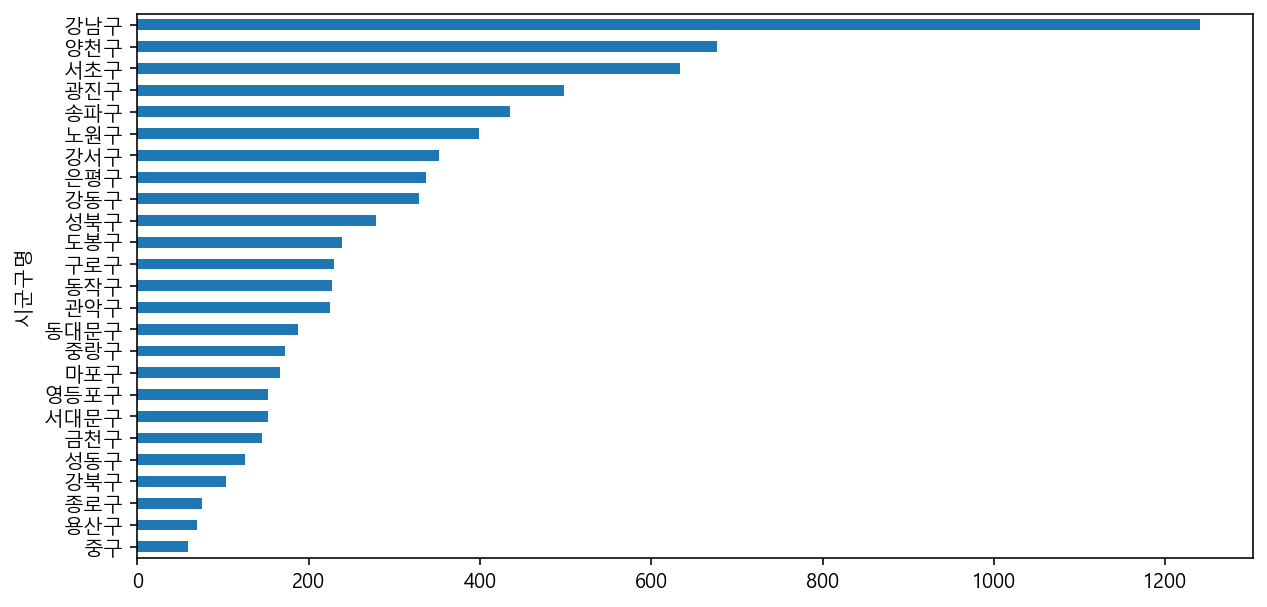

In [140]:
g.loc['학원-입시'].sort_values().plot.barh(figsize=(10,5))

In [143]:
#위의 그룹화한 데이터를 unstacj하고 iloc로 위에서 5개만 서브셋을 본다

g.unstack().iloc[:5,:5]

시군구명,강남구,강동구,강북구,강서구,관악구
상권업종소분류명,,,,,
고시원,139,62,11,32,83
독서실,125,46,14,60,69
서예/서화/미술,219,110,19,70,72
어린이집,189,210,112,262,220
피아노/바이올린/기타,266,189,47,150,139


<AxesSubplot:ylabel='상권업종소분류명'>

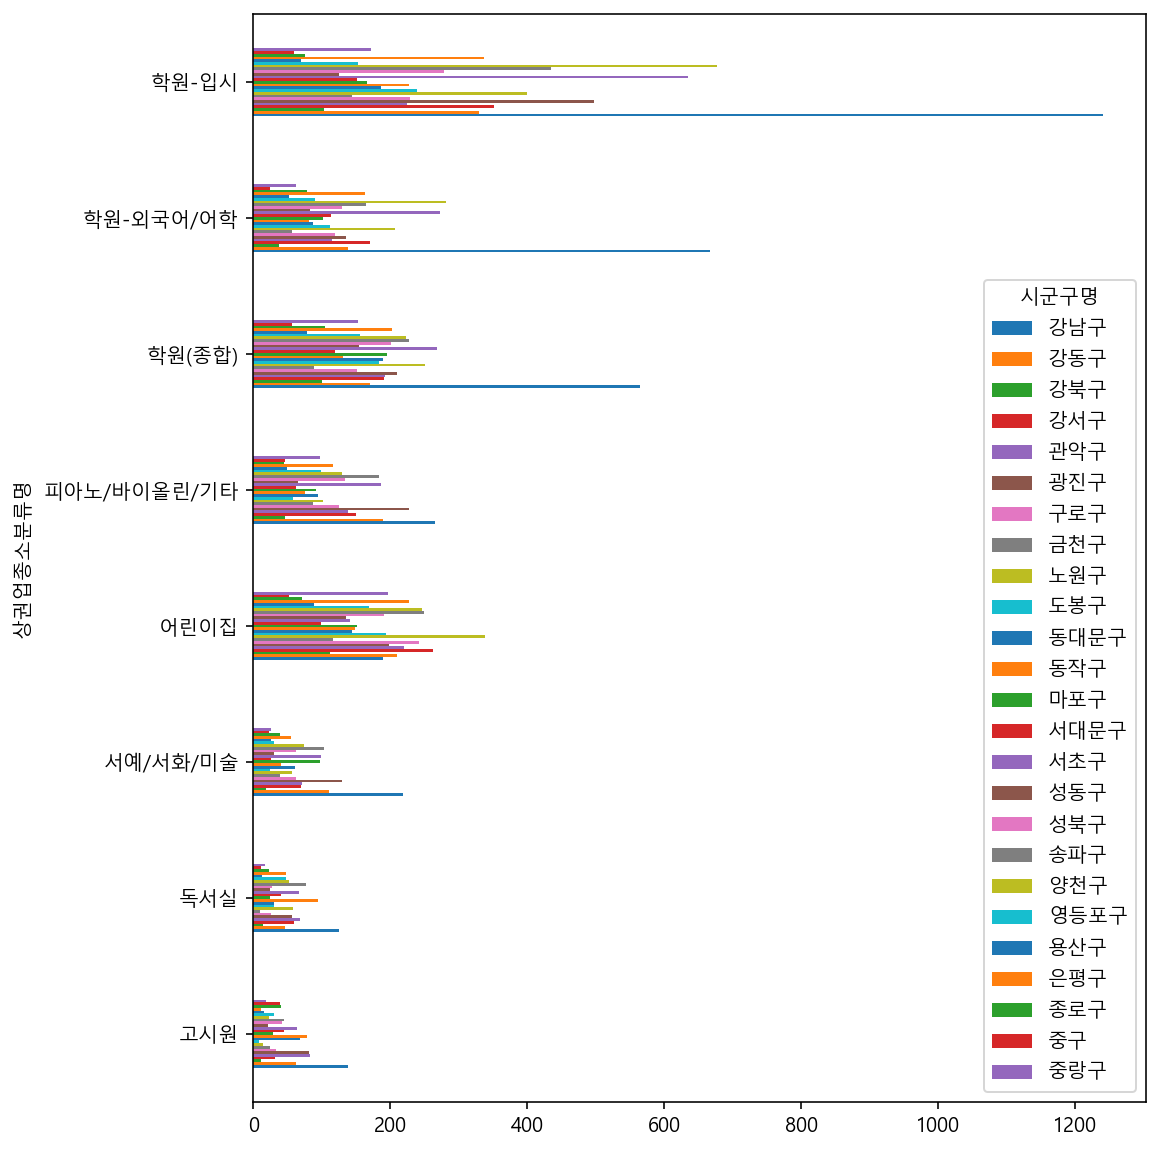

In [146]:
#룹화한 데이터를 unstacj을 사용하면 마지막 인덱스 컬럼이 컬럼으로 바뀐다. 

g.unstack().plot.barh(figsize=(8,10))



<AxesSubplot:xlabel='시군구명'>

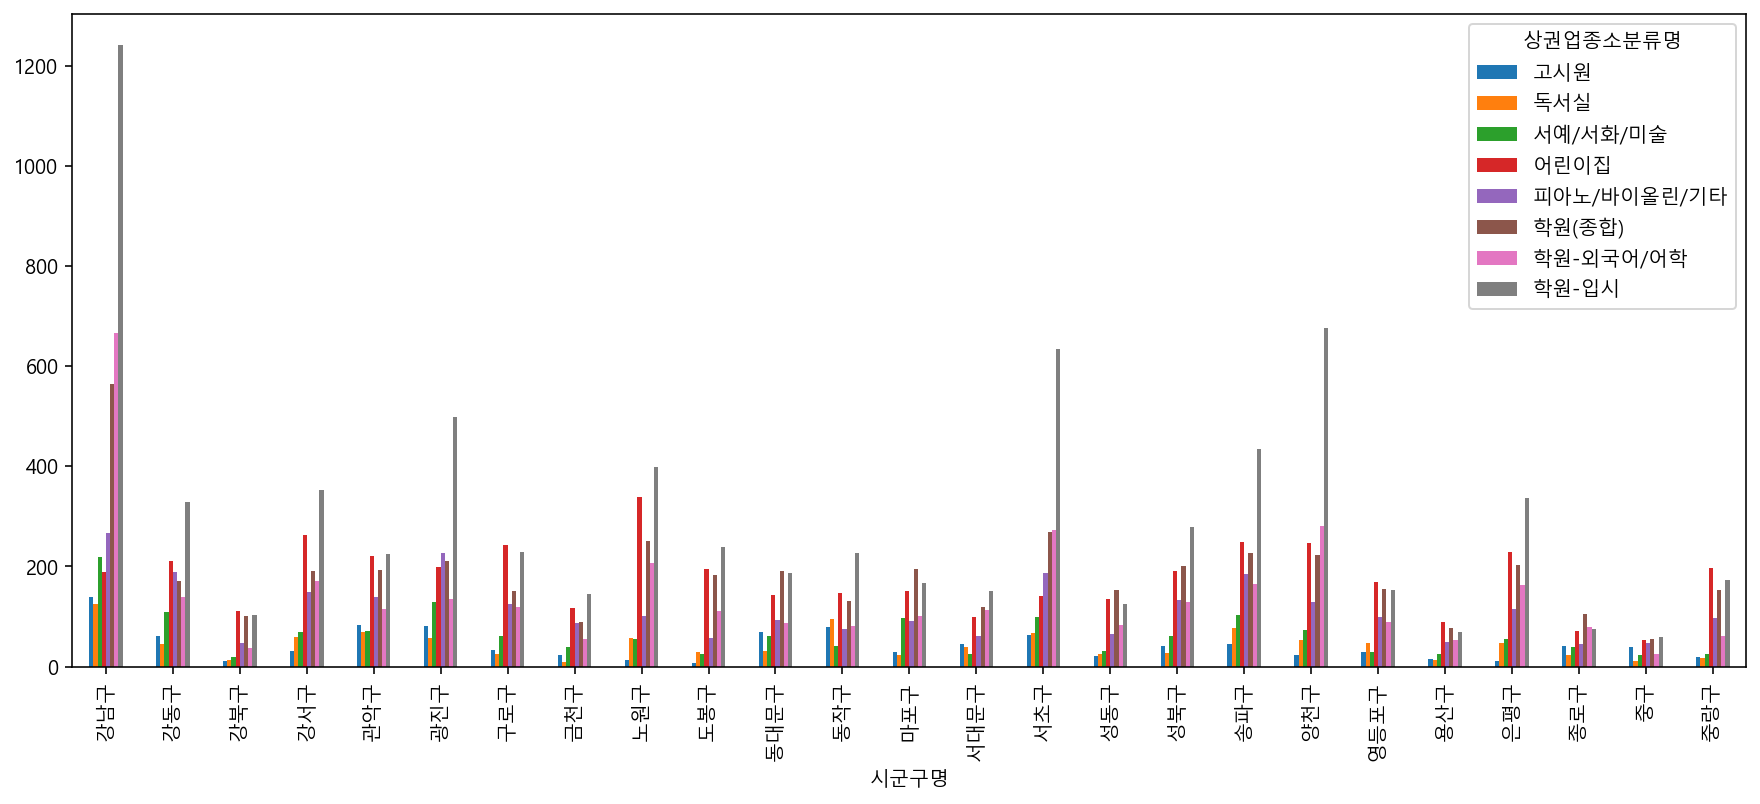

In [149]:
#구별로 학원수 시각화 하기 unstck()값에 t를 하명 행과 열이 바뀐다

g.unstack().T.plot.bar(figsize=(15,6))


In [152]:
t=g.reset_index()
t=t.rename(columns={'상호명':'상호수'})
t

,상권업종소분류명,시군구명,상호수
0,고시원,강남구,139
1,고시원,강동구,62
2,고시원,강북구,11
3,고시원,강서구,32
4,고시원,관악구,83
...,...,...,...
195,학원-입시,용산구,70
196,학원-입시,은평구,337
197,학원-입시,종로구,75
198,학원-입시,중구,59


#### 8.4 시각화

<AxesSubplot:xlabel='시군구명', ylabel='상호수'>

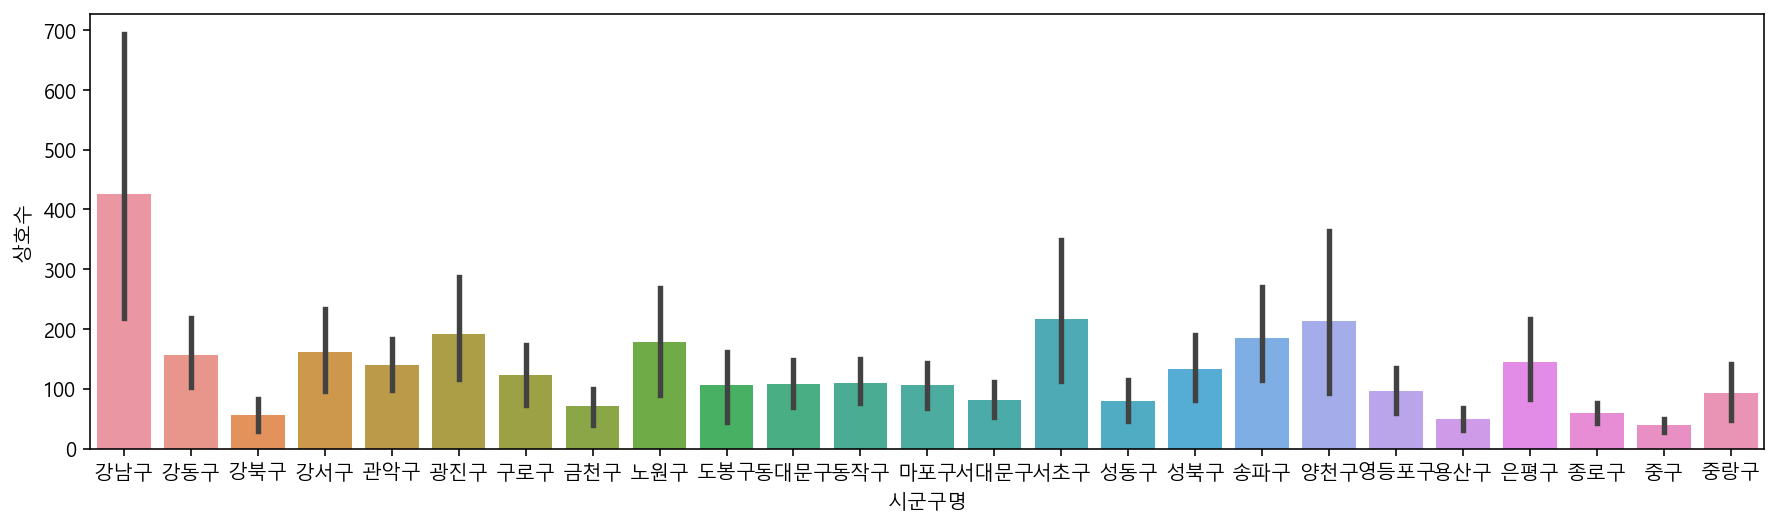

In [155]:
plt.figure(figsize=(15,4))
sns.barplot(data=t, x='시군구명',y='상호수')

<AxesSubplot:xlabel='상권업종소분류명', ylabel='상호수'>

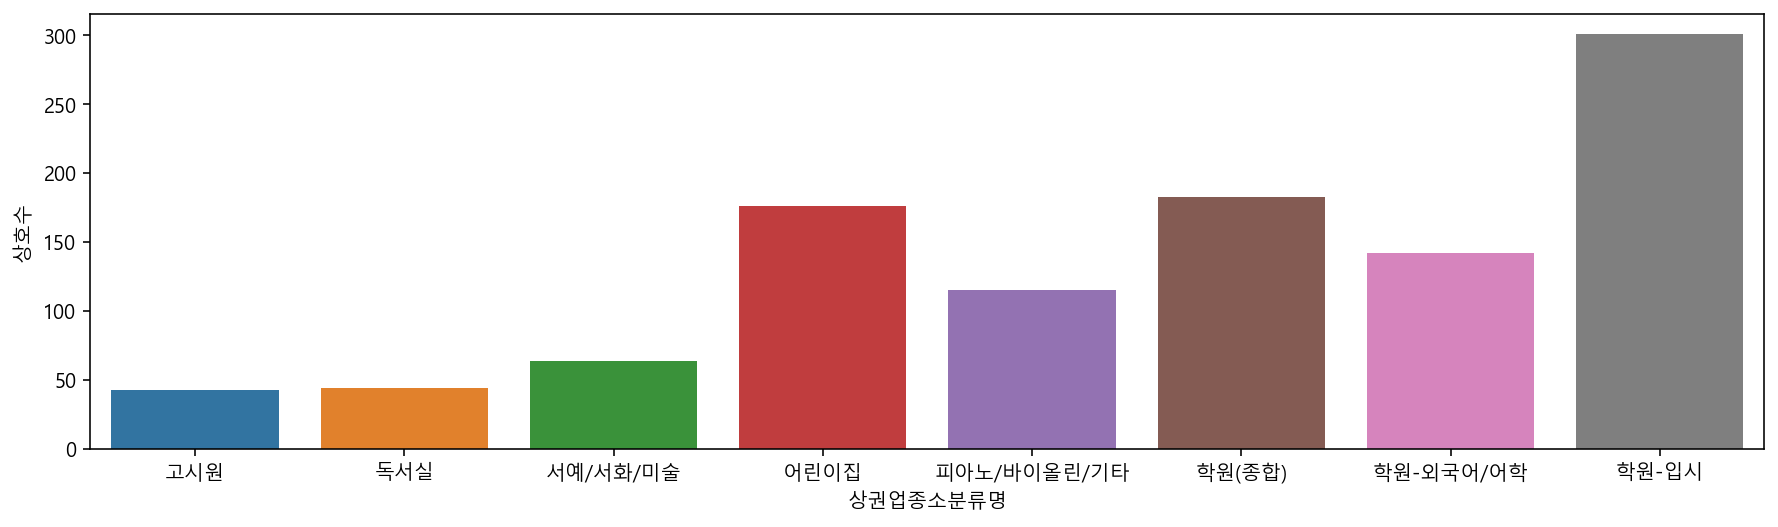

In [157]:
plt.figure(figsize=(15,4))
sns.barplot(data=t, x='상권업종소분류명',y='상호수',ci=None)

<AxesSubplot:xlabel='시군구명', ylabel='상호수'>

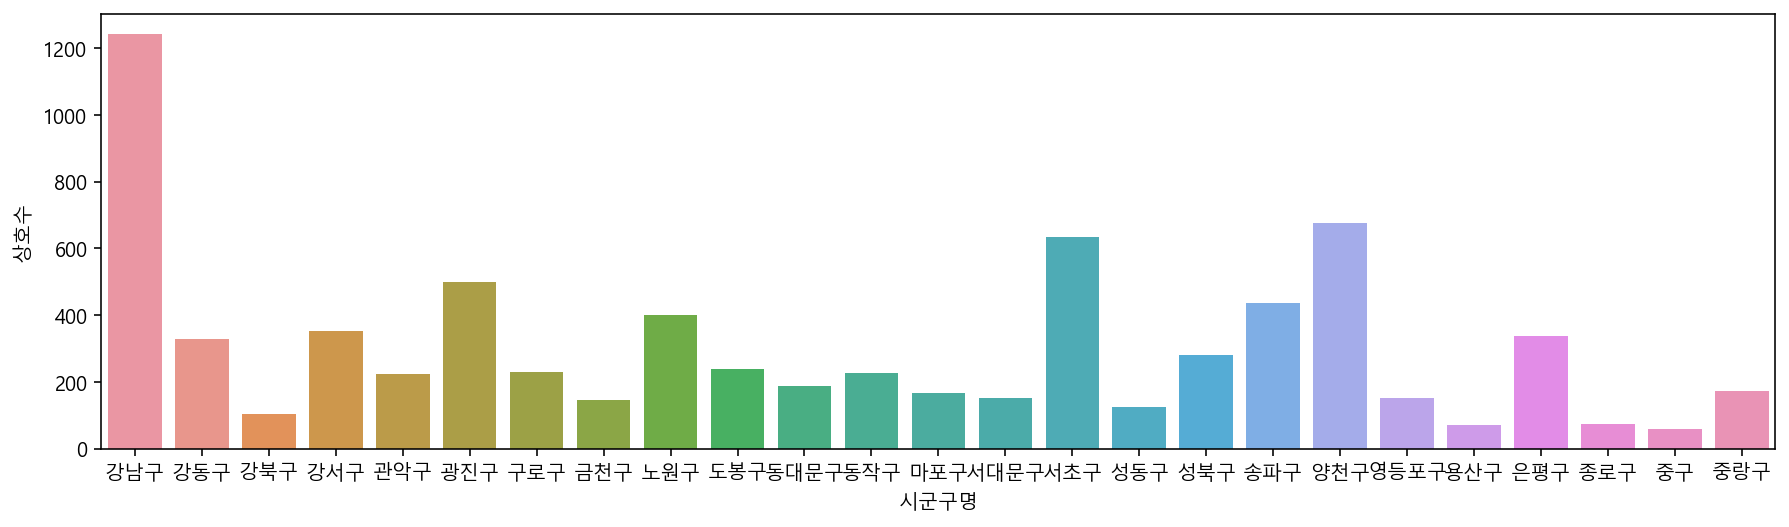

In [162]:
plt.figure(figsize=(15,4))
k=t[t['상권업종소분류명']=='학원-입시']
sns.barplot(data=k,x='시군구명',y='상호수',ci=None)

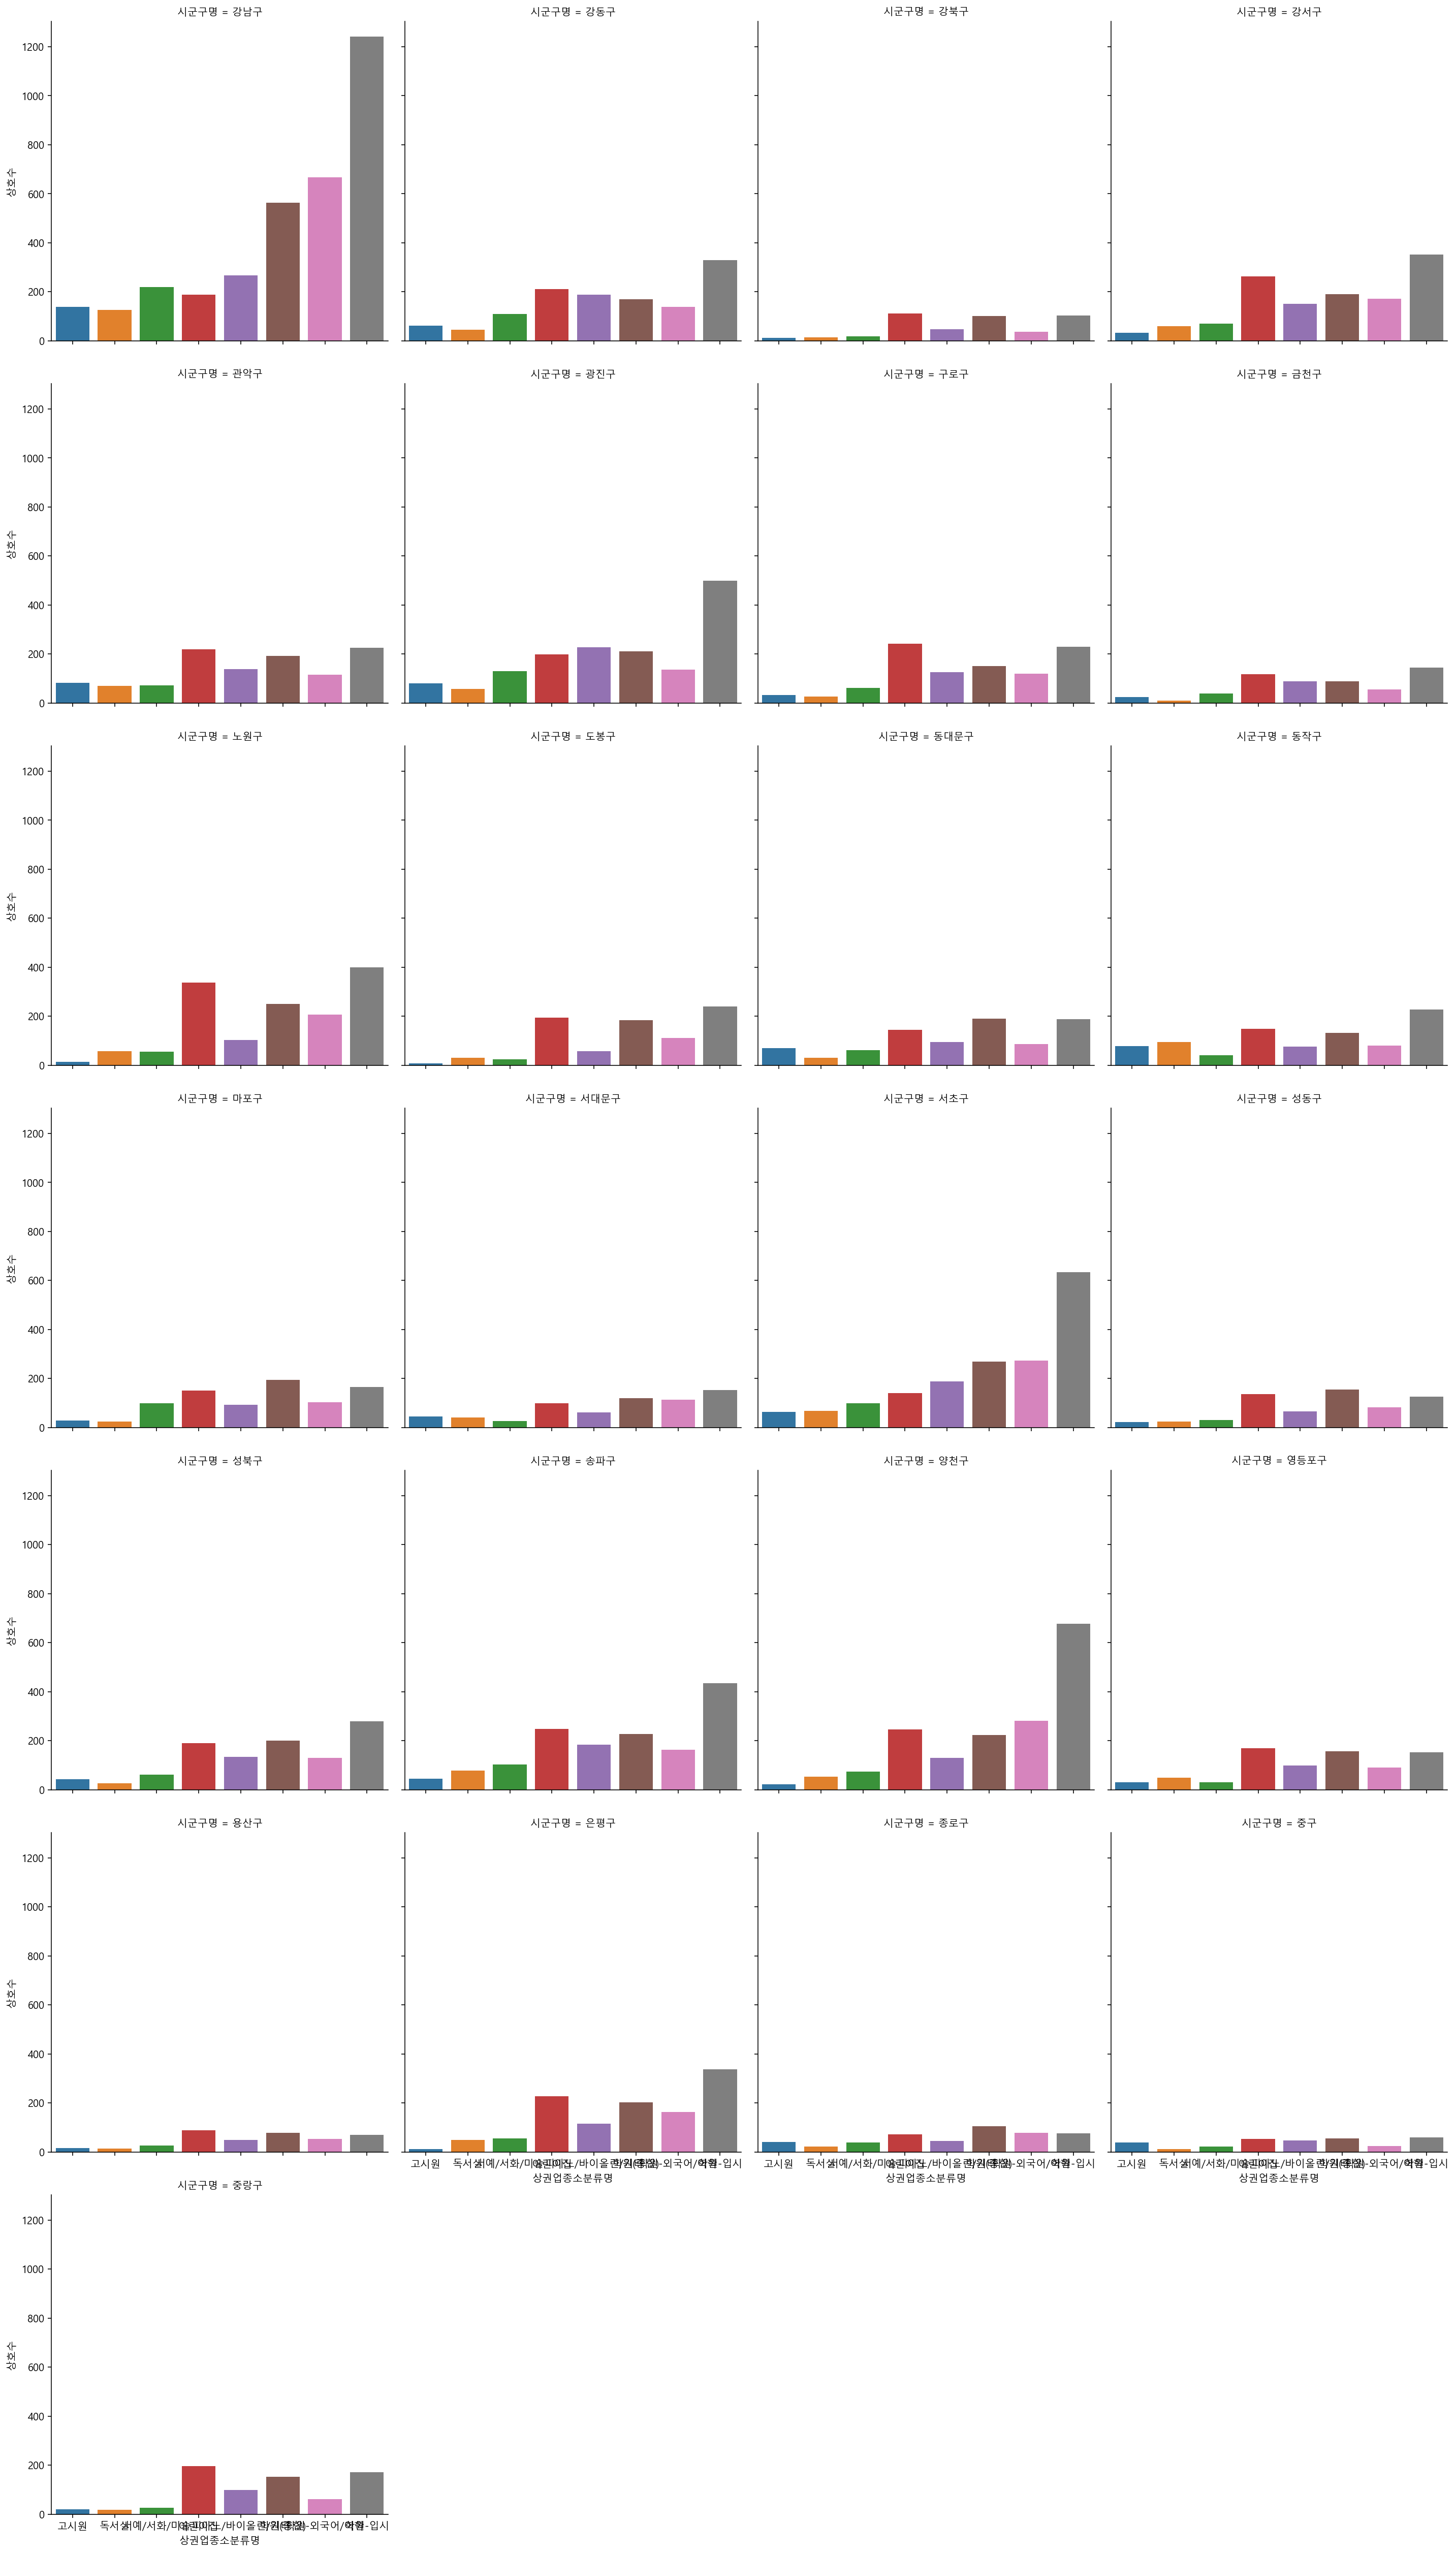

In [164]:
#굳이 catplot으로 bar그리는것은 나눠서 그래프 보려고
sns.catplot(data=t, x='상권업종소분류명',y='상호수',ci=None, kind='bar',col='시군구명',col_wrap=4)

#### 8.4  경도와 위도를 scatterplot로 그리기

<AxesSubplot:xlabel='경도', ylabel='위도'>

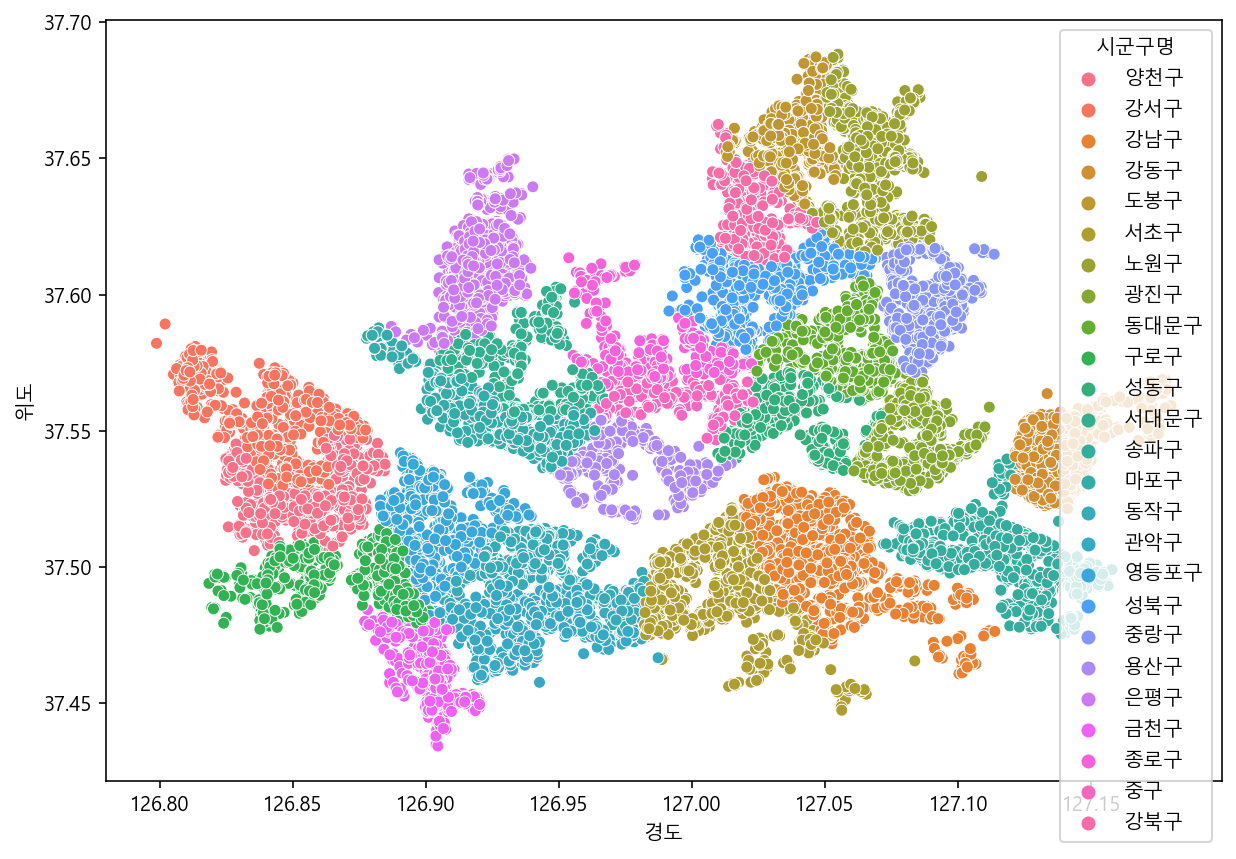

In [168]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_academy_selected,x='경도', y='위도',hue='시군구명')

<AxesSubplot:xlabel='경도', ylabel='위도'>

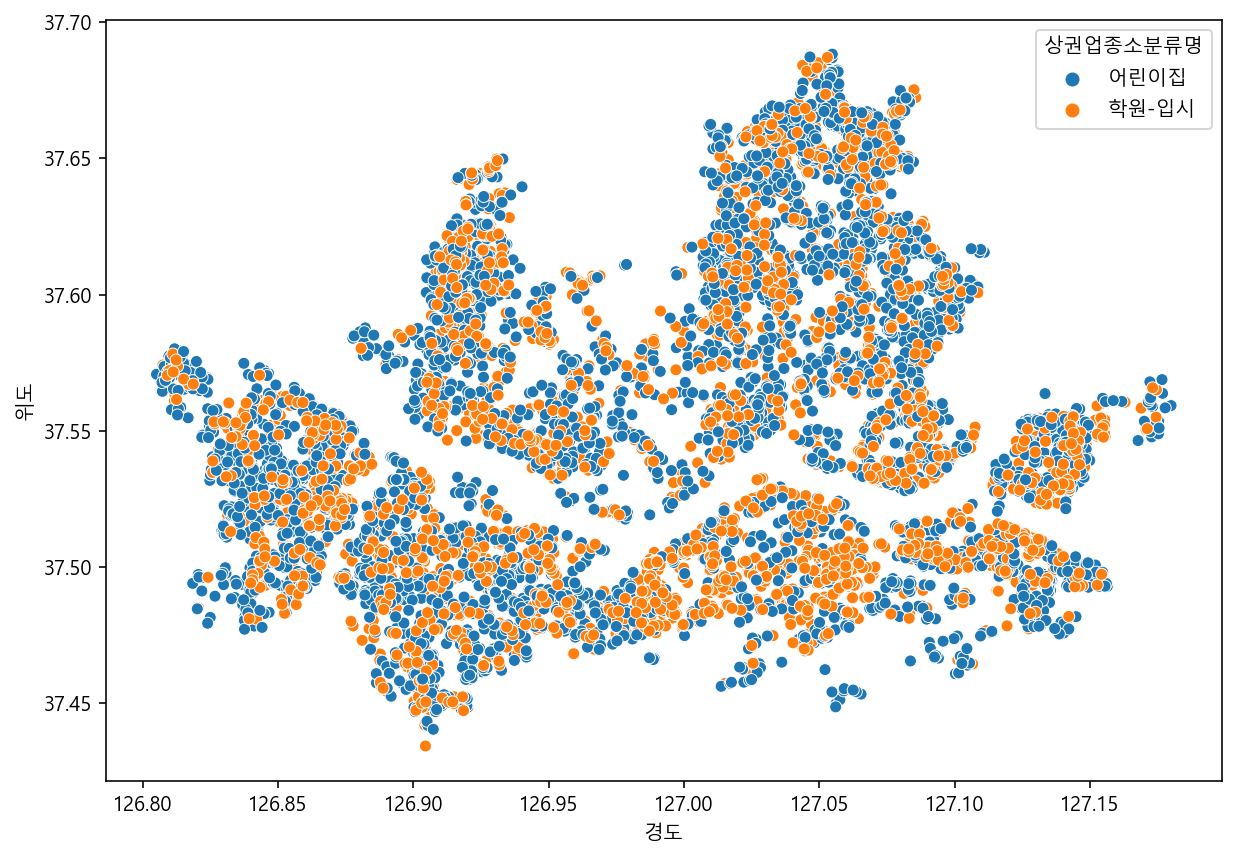

In [171]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df_academy_selected[df_academy_selected['상권업종소분류명'].isin(['어린이집','학원-입시'])],
    x='경도', y='위도',hue='상권업종소분류명')

### 9. Foilum으로 지도 활용하기

In [173]:
import folium 

In [175]:
long=df_academy_selected['경도'].mean()
lat=df_academy_selected['위도'].mean()

In [180]:
df_m=df_academy_selected[df_academy_selected['상권업종소분류명'].isin(['어린이집','학원-입시'])]
df_m=df_m.sample(1000)
df_m.shape

(1000, 16)

In [181]:
m=folium.Map(location=[lat,long],zoom_start=12)

folium.Marker([37.5545, 126.867], tooltip="해법수학").add_to(m)

m


In [182]:
m.save('index.html')

In [184]:
df_m.index

Int64Index([ 36740,  69050, 560108, 338969, 274068, 336999, 454951, 279961,
             99500, 341314,
            ...
            250893, 242602, 236878, 337103, 560106, 258740, 412763, 193242,
            333937, 240659],
           dtype='int64', length=1000)

In [189]:
for i in df_m.index[:10]:
    tooltip=df_m.loc[i,'상호명']+"-"+df_m.loc[i,'도로명주소']
    lat=tooltip=df_m.loc[i,'위도']
    long=df_m.loc[i,'경도']
    print(tooltip,lat,long)
  

37.5359539161008 37.5359539161008 126.877966511571
37.4922685465683 37.4922685465683 127.010746922185
37.4842763162183 37.4842763162183 126.889108423932
37.5070394834776 37.5070394834776 126.859148998925
37.6436402655523 37.6436402655523 126.922885911367
37.4741078858415 37.4741078858415 126.959873574316
37.5671212244127 37.5671212244127 127.03500079531
37.6550206370494 37.6550206370494 127.059930404504
37.460942736852 37.460942736852 126.906883826546
37.4937798397345 37.4937798397345 127.083034514764


In [192]:
m=folium.Map(location=[lat,long],zoom_start=12)

for i in df_m.index[:10]:
    tooltip=df_m.loc[i,'상호명']+"-"+df_m.loc[i,'도로명주소']
    lat=tooltip=df_m.loc[i,'위도']
    long=df_m.loc[i,'경도']
    
    folium.CircleMarker([lat, long], tooltip="tooltip").add_to(m)
m